In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 270)

In [172]:
# Importing 11/8 df for hospitalizations and deaths (using testing df below for positive cases since cases more
# accurately mirror those presented on the City website)
df = pd.read_csv('COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv')

In [173]:
# removing dates that are null
df = df[df['Date']!='nan']

In [174]:
# converting date to datetime format and set index
df.Date = pd.to_datetime(df.Date)
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)

In [175]:
# filling missing hospitalization data by forward filling
df.ffill(inplace=True)

In [176]:
# Import Testing df for daily tests administered and number of tests that came back positive (the below data
# was pulled on 11/8)
testing = pd.read_csv('COVID-19_Daily_Testing_-_By_Test.csv')

In [177]:
# Preliminary cleaning
testing = testing[testing['Date']!='nan']
testing.Date = pd.to_datetime(testing.Date)
testing.sort_values(by='Date', inplace=True)
testing.set_index('Date', inplace=True)

In [178]:
# Comparison of cases (from cases, hospitalization, and deaths) to positive tests from testing df
pd.merge(df['Cases - Total'], testing['Positive Tests'], left_index=True, right_index=True).tail()

,Cases - Total,Positive Tests
Date,,
2020-11-04,"1,943",2119
2020-11-05,"1,576",1077
2020-11-06,480,403
2020-11-07,165,39
NaT,177,52


In [179]:
# Using only up to the most recent day with complete data (11/3)
df = df.iloc[:-6, :]
testing = testing.iloc[:-5,:]

In [180]:
testing['posRate'] = round((testing['Positive Tests'].rolling(7).mean()/(testing['Positive Tests'].rolling(7).mean() + testing['Not Positive Tests'].rolling(7).mean())), 4)

In [181]:
# Replacing null with zero
testing.posRate.replace(np.nan, 0, inplace=True)

<ipython-input-31-43355a604646>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(0.93, .35, 0.3, 0.2), loc='upper right', frameon=False)


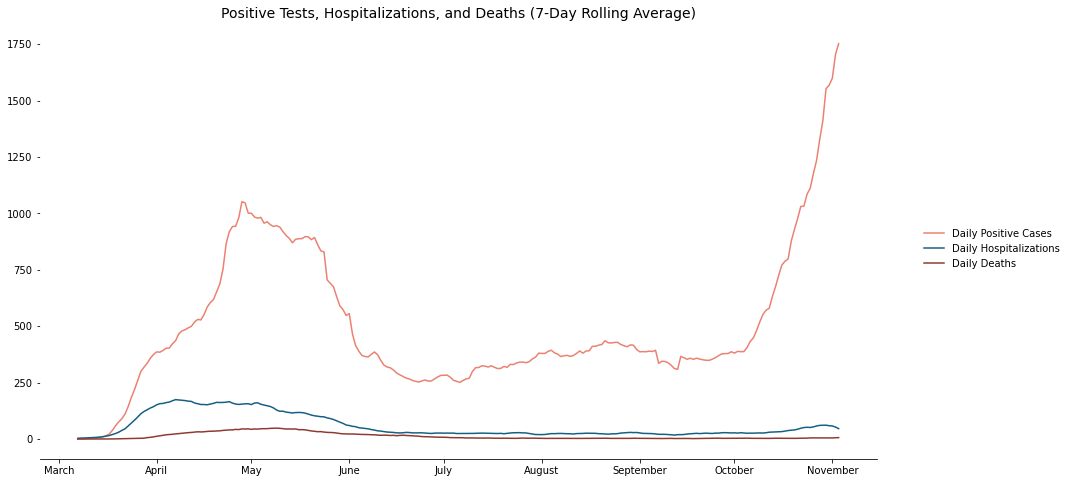

In [31]:
title = 'Positive Tests, Hospitalizations, and Deaths (7-Day Rolling Average)'
var_labels = ['Daily Positive Cases', 'Daily Hospitalizations', 'Daily Deaths']

fig, ax = plt.subplots(figsize=(15,8))
fig.patch.set_facecolor('white')

colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
        '#a2755e']

x = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

cases = ax.plot(testing['Positive Tests'].rolling(7).mean(), color = colors[0])
hospitalizations = ax.plot(df['Hospitalizations - Total'].rolling(7).mean(), color = colors[1])
deaths = ax.plot(df['Deaths - Total'].rolling(7).mean(), color = colors[2])
var_handles = [cases, hospitalizations, deaths]

spine_position = ['top', 'left', 'right']
for spine in spine_position:    
    ax.spines[spine].set_color('white')

ax.set_title(title, fontsize=14)
ax.set_xticklabels(x)

ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(0.93, .35, 0.3, 0.2), loc='upper right', frameon=False)
plt.show()


In [32]:
def make_line_plot(dataframe, vars_list, var_labels, title, dist):
    fig, ax = plt.subplots(figsize=(15,8))
    fig.patch.set_facecolor('white')

    colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
            '#a2755e']

    x = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
    
    var_handles = []
    for i in range(len(vars_list)):
        var_handles.append(ax.plot(dataframe[vars_list[i]].rolling(7).mean(), color = colors[i]))

    spine_position = ['top', 'left', 'right']
    for spine in spine_position:    
        ax.spines[spine].set_color('white')

    ax.set_title(title, fontsize=14)
    ax.set_xticklabels(x)

    ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
    plt.show()


While cases spiked in the month of October, deaths and hospitalizations remained relatively low in Chicago. This could imply that hospitals are more equipped to handle the virus than previously.

## Daily Cases
Using positive tests for this metric as it seems to better reflect the trend the city is experiencing. Case count in df seems to underestimate the number of cases each day.

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


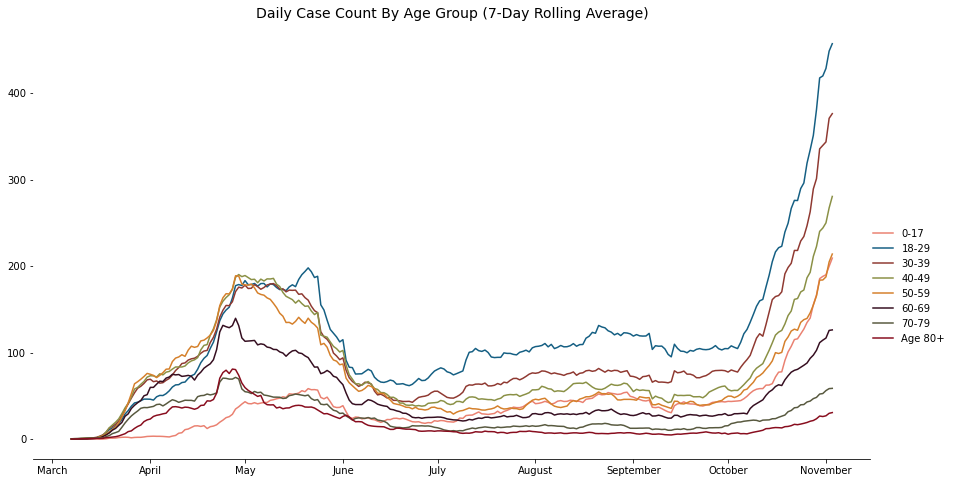

In [33]:
# Plotting cases by age group
make_line_plot(vars_list = list(testing.columns[22:30]),
    dataframe = testing,
    title = 'Daily Case Count By Age Group (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

In the chart above, we can see that all throughout the summer and fall, individuals netween the ages of 18 and 29 have led the city in positive cases. This is likely the result of individuals in this age group being both more risky, but also more likely to be tested than older individuals.

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


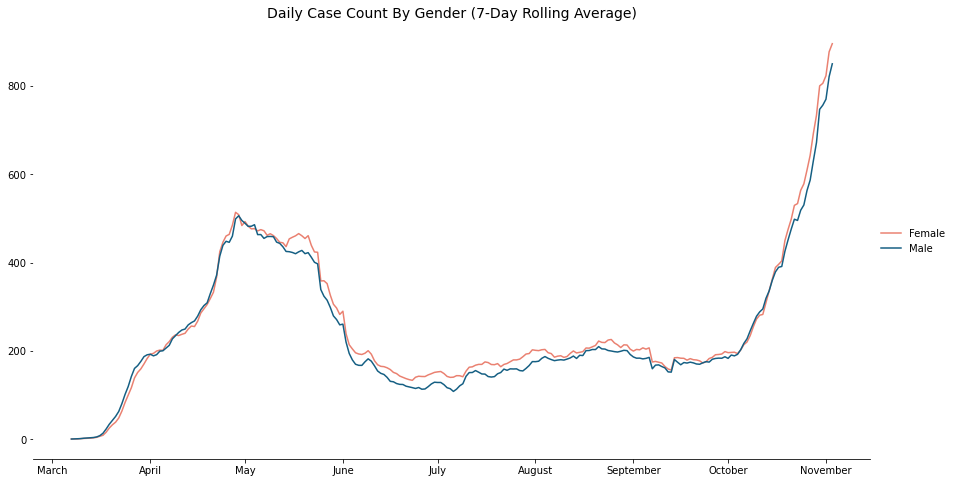

In [34]:
# Plotting cases by gender
make_line_plot(vars_list = list(testing.columns[31:33]),
    dataframe = testing,
    title = 'Daily Case Count By Gender (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Female', 'Male'])


Males and females test positivie for the virus at similar rates.

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


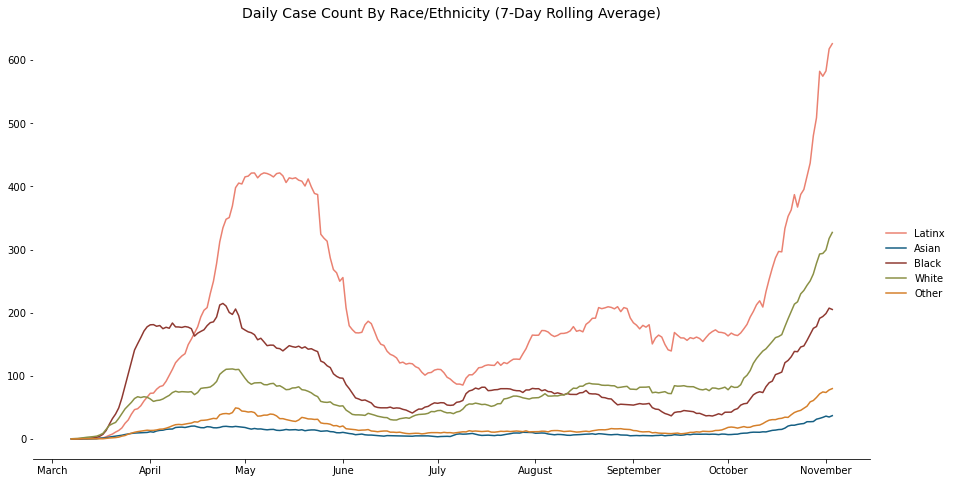

In [35]:
# Plotting cases by race/ethnicity
make_line_plot(vars_list = list(testing.columns[34:39]),
    dataframe = testing,
    title = 'Daily Case Count By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

Latinx individuals lead others in Covid-19 positivity.

## Daily Testing

In [36]:
testing.head(3)

,Day,Positive Tests,Not Positive Tests,Total Tests,Tests - Age 0-17,Tests - Age 18-29,Tests - Age 30-39,Tests - Age 40-49,Tests - Age 50-59,Tests - Age 60-69,Tests - Age 70-79,Tests - Age 80+,Tests - Age Unknown,Tests - Female,Tests - Male,Tests - Gender Unknown,Tests - Latinx,Tests - Asian Non-Latinx,Tests - Black Non-Latinx,Tests - White Non-Latinx,Tests - Other Race Non-Latinx,Tests - Unknown Race/Ethnicity,Positive Tests - Age 0-17,Positive Tests - Age 18-29,Positive Tests - Age 30-39,Positive Tests - Age 40-49,Positive Tests - Age 50-59,Positive Tests - Age 60-69,Positive Tests - Age 70-79,Positive Tests - Age 80+,Positive Tests - Age Unknown,Positive Tests - Female,Positive Tests - Male,Positive Tests - Unknown Gender,Positive Tests - Latinx,Positive Tests - Asian Non-Latinx,Positive Tests - Black Non-Latinx,Positive Tests - White Non-Latinx,Positive Tests - Other Race Non-Latinx,Positive Tests - Unknown Race/Ethnicity,Not-Positive Tests - Age 0-17,Not-Positive Tests - Age 18-29,Not-Positive Tests - Age 30-39,Not-Positive Tests - Age 40-49,Not-Positive Tests - Age 50-59,Not-Positive Tests - Age 60-69,Not-Positive Tests - Age 70-79,Not-Positive Tests - Age 80+,Not-Positive Tests - Age Unknown,Not-Positive Tests - Female,Not-Positive Tests - Male,Not-Positive Tests - Gender Unknown,Not-Positive Tests - Latinx,Not-Positive Tests - Asian Non-Latinx,Not-Positive Tests - Black Non-Latinx,Not-Positive Tests - White Non-Latinx,Not-Positive Tests - Other Race Non-Latinx,Not-Positive Tests - Unknown Race/Ethnicity,posRate
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,Sunday,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,NaN
2020-03-02,Monday,0,5,5,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,NaN
2020-03-03,Tuesday,0,9,9,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,3,0,1,NaN


<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


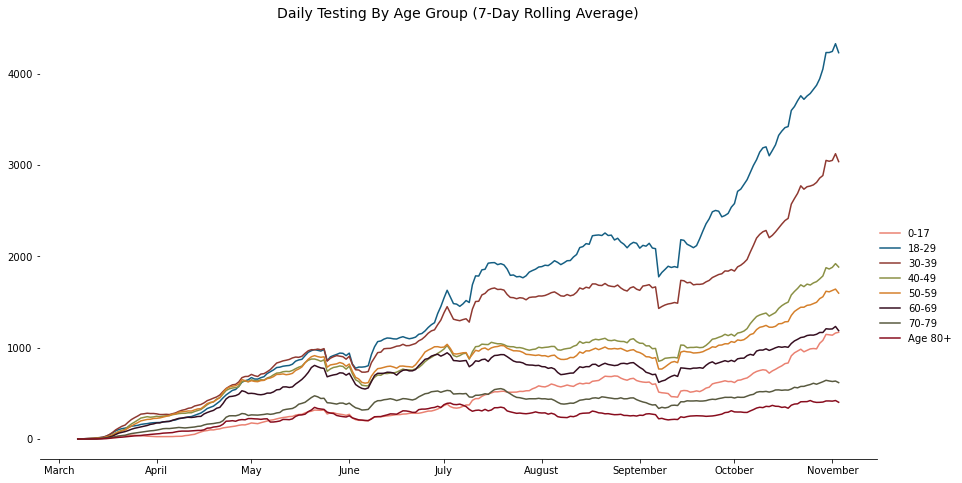

In [37]:
# Plotting testing by age group
make_line_plot(vars_list = list(testing.columns[4:12]),
    dataframe = testing,
    title = 'Daily Testing By Age Group (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


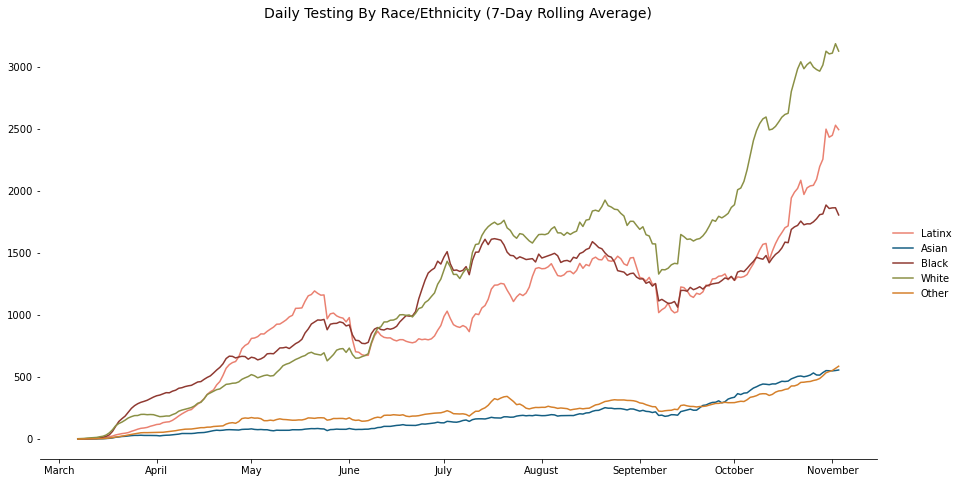

In [38]:
# Plotting testing by race/ethnicity
make_line_plot(vars_list = list(testing.columns[16:21]),
    dataframe = testing,
    title = 'Daily Testing By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

## Daily Deaths from Covid-19

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


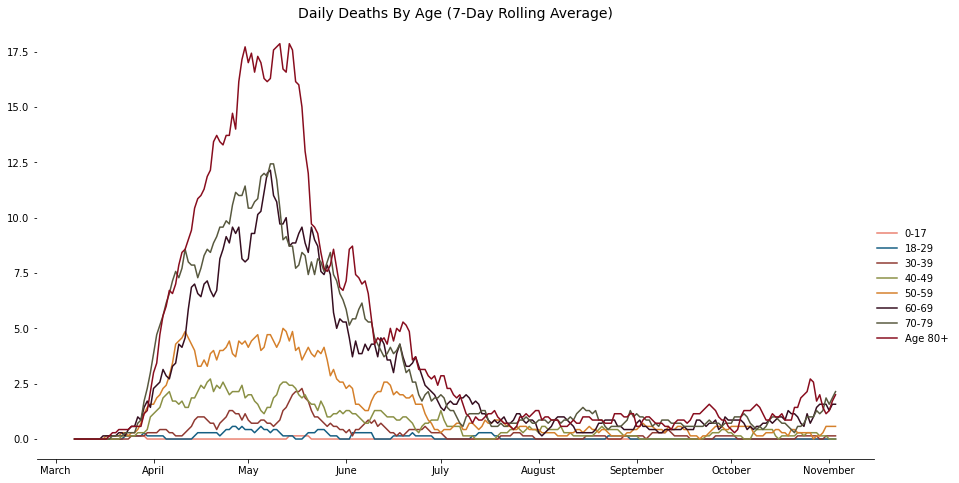

In [39]:
# Plotting cases by Age
make_line_plot(vars_list = list(df.columns[21:29]),
    dataframe = df,
    title = 'Daily Deaths By Age (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

Individuals above 80 continue to be most affected by the virus, followed by individuals in their 60s and 40s.

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


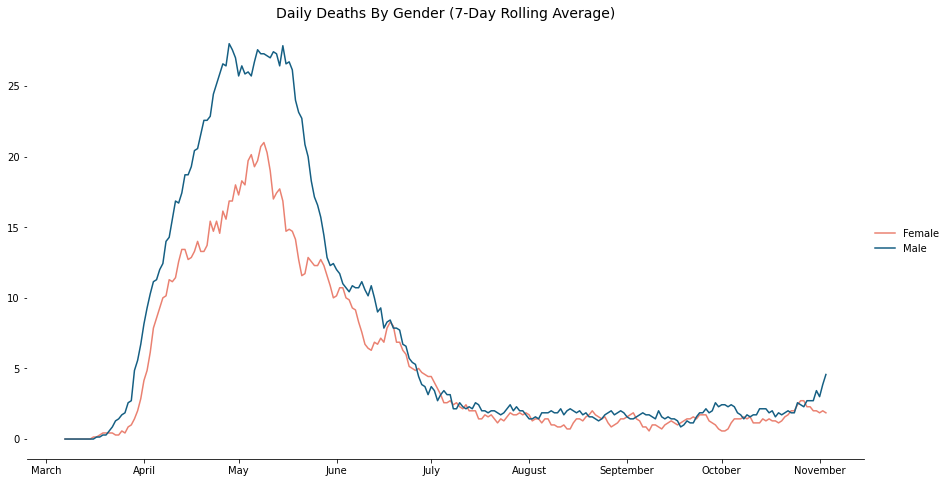

In [40]:
# Plotting deaths by gender
make_line_plot(vars_list = list(df.columns[30:32]),
    dataframe = df,
    title = 'Daily Deaths By Gender (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Female', 'Male'])

Consistently, mem seem to die more, on average, than women.

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


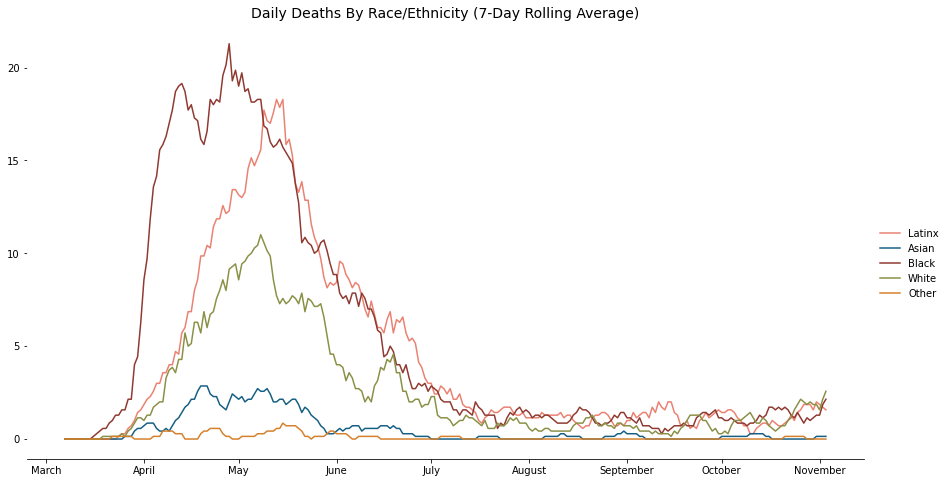

In [41]:
# Plotting deaths by race/ethnicity
make_line_plot(vars_list = list(df.columns[33:38]),
    dataframe = df,
    title = 'Daily Deaths By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

Daily deaths in the city remain relatively low with only a slight uptick in deaths among Black and White people near the start of November.

## Daily Hospitalizations from Covid-19

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


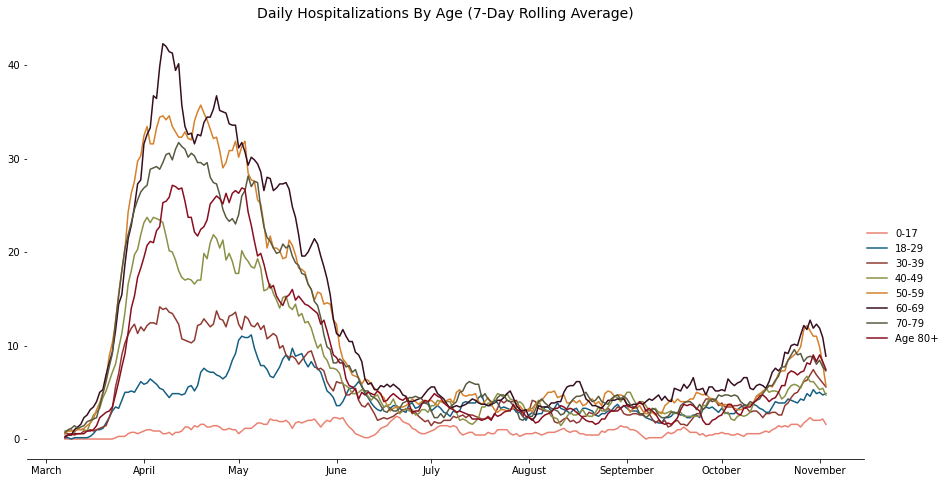

In [42]:
# Plotting cases by Age
make_line_plot(vars_list = list(df.columns[39:47]),
    dataframe = df,
    title = 'Daily Hospitalizations By Age (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


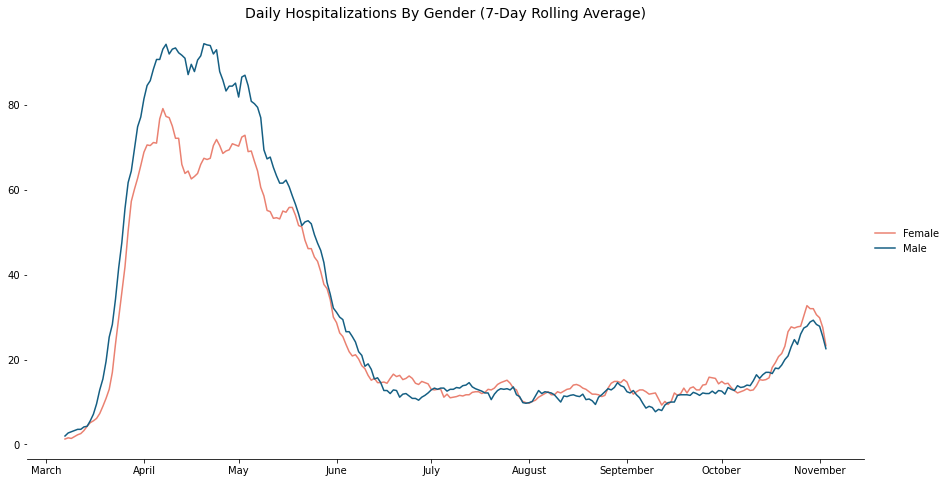

In [43]:
# Plotting hospitalizations by gender
make_line_plot(vars_list = list(df.columns[48:50]),
    dataframe = df,
    title = 'Daily Hospitalizations By Gender (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Female', 'Male'])

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


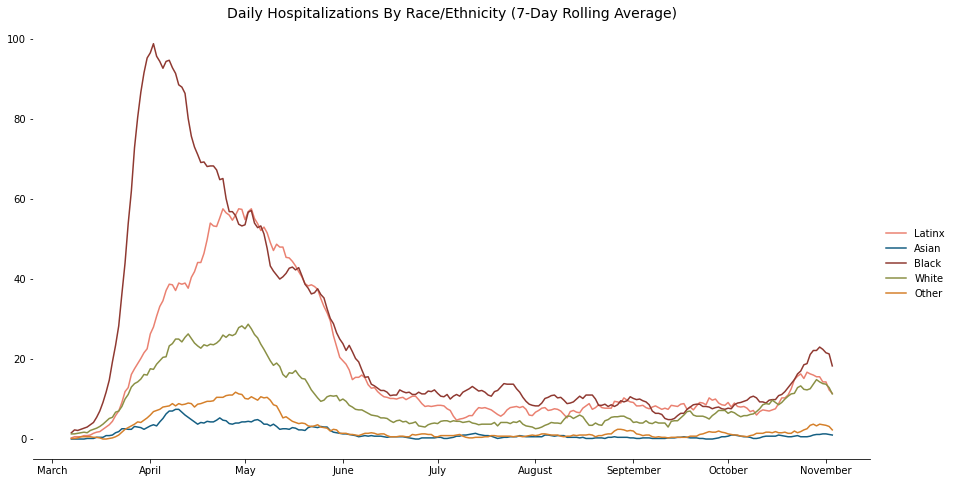

In [44]:
# Plotting hospitalizations by race/ethnicity
make_line_plot(vars_list = list(df.columns[51:-1]),
    dataframe = df,
    title = 'Daily Hospitalizations By Race/Ethnicity (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

# Cumulative Case Count

In [45]:
# Making cumulative case count for total
def cum_count(series):
    output = []
    for i in range(len(series)):
        if i == 0:
            output.append(series[0])
        else:
            output.append(series[i]+output[i-1])
    return output

testing['cum_cases'] = cum_count(testing['Positive Tests'])

In [46]:
# Making cumulative case counts by age
var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+']
var_loc = np.arange(22,30,1)
for i in range(len(var_loc)):
    testing['{}_cum_cases'.format(var_labels[i])] = cum_count(testing.iloc[:,var_loc[i]])

In [47]:
# Making cumulative case counts by race
var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other']
var_loc = np.arange(34,39,1)
for i in range(len(var_loc)):
    testing['{}_cum_cases'.format(var_labels[i])] = cum_count(testing.iloc[:,var_loc[i]])

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


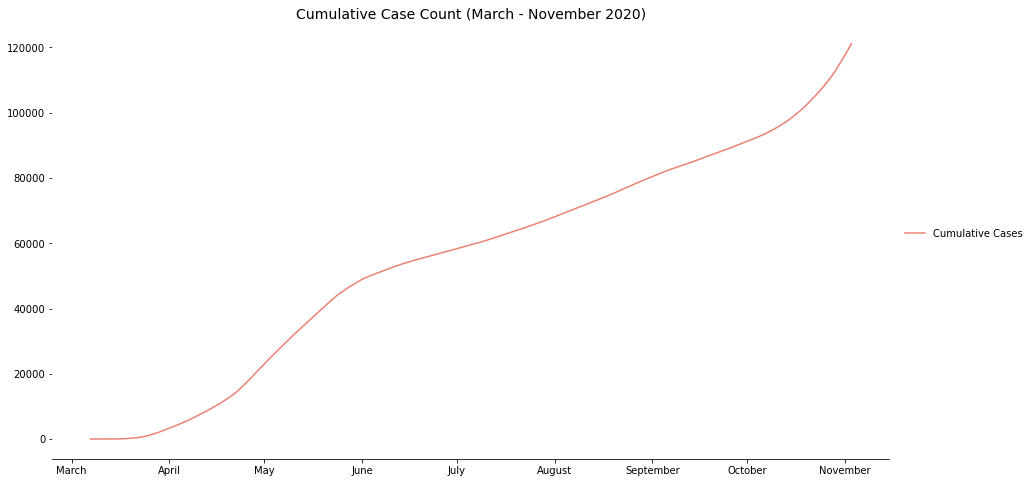

In [48]:
# plotting cumulative cases overall
make_line_plot(vars_list = ['cum_cases'],
    dataframe = testing,
    title = 'Cumulative Case Count (March - November 2020)',
    dist = .87,
    var_labels = ['Cumulative Cases'])

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


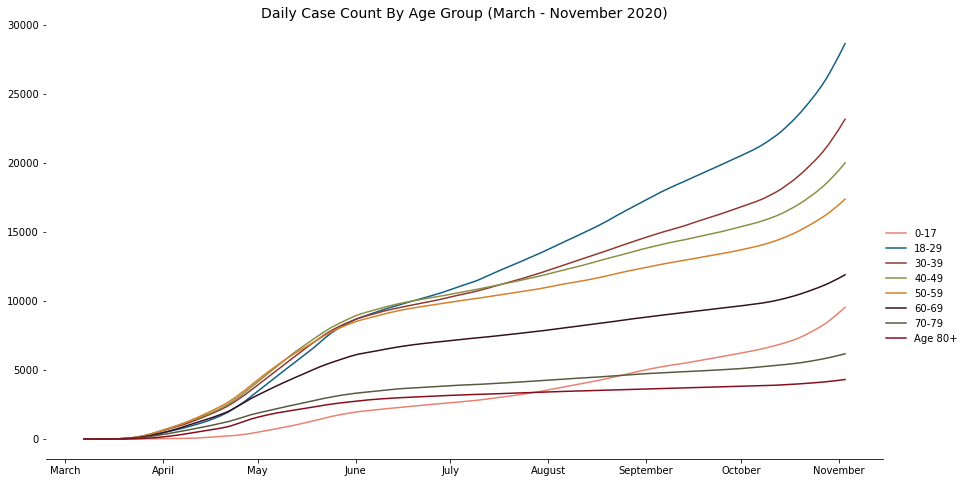

In [49]:
# Plotting cumulative cases by age
make_line_plot(vars_list = list(testing.columns[-13:-5]),
    dataframe = testing,
    title = 'Daily Case Count By Age Group (March - November 2020)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


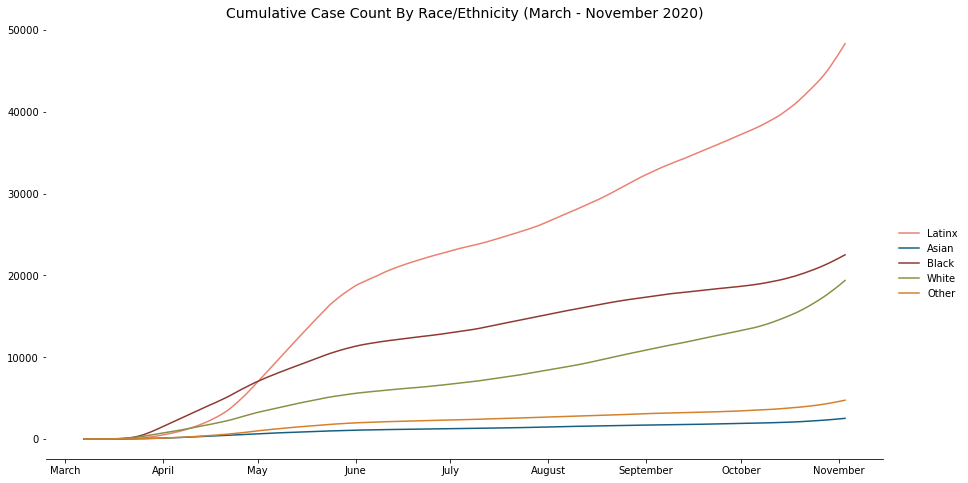

In [50]:
# Plotting cumulative cases by race/ethnicity
make_line_plot(vars_list = list(testing.columns[-5:]),
    dataframe = testing,
    title = 'Cumulative Case Count By Race/Ethnicity (March - November 2020)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

## Positivity Rates

In [182]:
# Making positivity rate columns by age
var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+']
var_loc1 = np.arange(22,30,1) # positive cases by age group
var_loc2 = np.arange(4,12,1) # total tests administered by age group
for i in range(len(var_loc1)):
    testing['{}_posRate'.format(var_labels[i])] = round((testing.iloc[:,var_loc1[i]] / testing.iloc[:,var_loc2[i]])*100, 2)

In [183]:
# Making positivity rate columns by race
var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other']
var_loc1 = np.arange(34,39,1) # positive cases by race
var_loc2 = np.arange(16,21,1) # total tests administered by race
for i in range(len(var_loc1)):
    testing['{}_posRate'.format(var_labels[i])] = round((testing.iloc[:,var_loc1[i]] / testing.iloc[:,var_loc2[i]])*100, 2)

In [184]:
# Replacing null values with 0 since they are a result of dividing 
testing.iloc[:,-13:] = testing.iloc[:,-13:].replace(np.nan, 0.00)

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


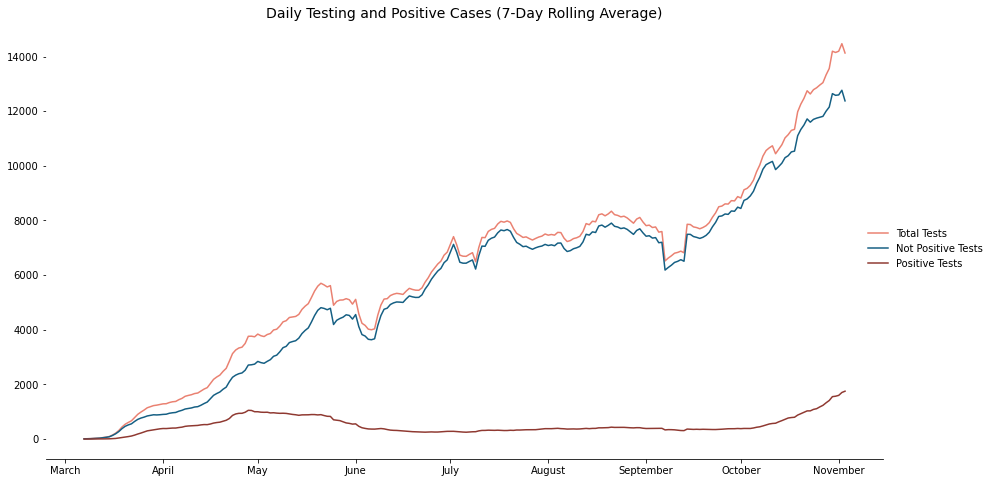

In [54]:
# Plotting positivity rate
make_line_plot(vars_list = ['Total Tests', 'Not Positive Tests', 'Positive Tests'],
    dataframe = testing,
    title = 'Daily Testing and Positive Cases (7-Day Rolling Average)',
    dist = .83,
    var_labels = ['Total Tests', 'Not Positive Tests', 'Positive Tests'])

<ipython-input-55-e9d14dd754a9>:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(0.85, .35, 0.3, 0.2), loc='upper right', frameon=False)


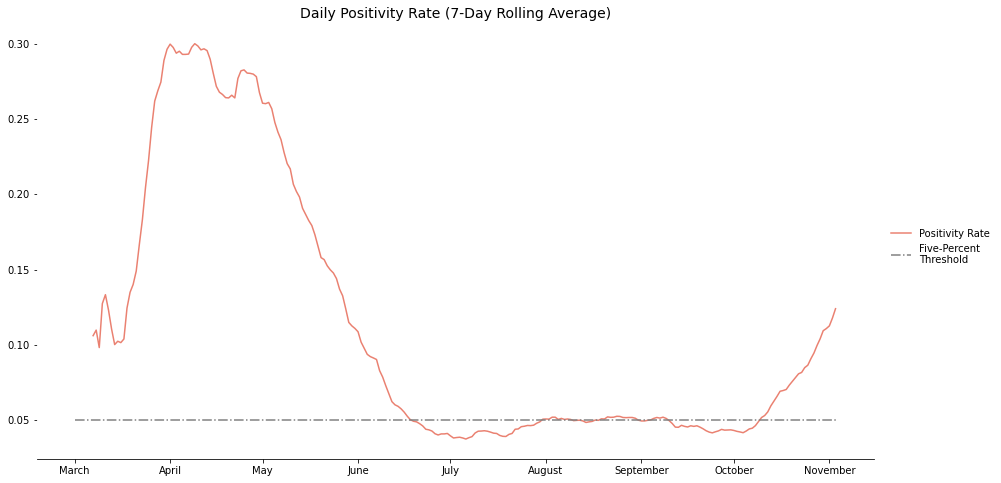

In [55]:
title = 'Daily Positivity Rate (7-Day Rolling Average)'
var_labels = ['Positivity Rate', 'Five-Percent\nThreshold']

fig, ax = plt.subplots(figsize=(15,8))
fig.patch.set_facecolor('white')

colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
        '#a2755e']

x = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

pos_rate = ax.plot(testing.posRate, color = colors[0])
threshold = ax.plot(pd.Series(.05, index=testing.posRate.index), color = 'grey', linestyle='-.')
var_handles = [pos_rate, threshold]

spine_position = ['top', 'left', 'right']
for spine in spine_position:    
    ax.spines[spine].set_color('white')

ax.set_title(title, fontsize=14)
ax.set_xticklabels(x)

ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(0.85, .35, 0.3, 0.2), loc='upper right', frameon=False)
plt.show()

The above should be interpreted cautiously. At the start of the pandemic, testing was not widely available and, as such, there were more positive cases as a percentage of tests administered. As testing expanded, there were more cases, especialy in October, but testing was widely available creating the illusion that positivity rates are not large. However, even with expanded testing, it should be noted that a positivity rate above 5 percent could indicate that testing may not be readily available (this was certainly the case in March - May) or that the percentage of residents testing positive is fairly high. In this case, the new October spike is significantly higher than 5 percent implying that most of Chicago residents who are being tested are positive and measures must be taken to mitigate the spread of the virus. On October 23, Chicago implemented a 9 pm curfew for bars and restaurants and limited indoor dining substantially. 

In [56]:
testing.head()

,Day,Positive Tests,Not Positive Tests,Total Tests,Tests - Age 0-17,Tests - Age 18-29,Tests - Age 30-39,Tests - Age 40-49,Tests - Age 50-59,Tests - Age 60-69,Tests - Age 70-79,Tests - Age 80+,Tests - Age Unknown,Tests - Female,Tests - Male,Tests - Gender Unknown,Tests - Latinx,Tests - Asian Non-Latinx,Tests - Black Non-Latinx,Tests - White Non-Latinx,Tests - Other Race Non-Latinx,Tests - Unknown Race/Ethnicity,Positive Tests - Age 0-17,Positive Tests - Age 18-29,Positive Tests - Age 30-39,Positive Tests - Age 40-49,Positive Tests - Age 50-59,Positive Tests - Age 60-69,Positive Tests - Age 70-79,Positive Tests - Age 80+,Positive Tests - Age Unknown,Positive Tests - Female,Positive Tests - Male,Positive Tests - Unknown Gender,Positive Tests - Latinx,Positive Tests - Asian Non-Latinx,Positive Tests - Black Non-Latinx,Positive Tests - White Non-Latinx,Positive Tests - Other Race Non-Latinx,Positive Tests - Unknown Race/Ethnicity,Not-Positive Tests - Age 0-17,Not-Positive Tests - Age 18-29,Not-Positive Tests - Age 30-39,Not-Positive Tests - Age 40-49,Not-Positive Tests - Age 50-59,Not-Positive Tests - Age 60-69,Not-Positive Tests - Age 70-79,Not-Positive Tests - Age 80+,Not-Positive Tests - Age Unknown,Not-Positive Tests - Female,Not-Positive Tests - Male,Not-Positive Tests - Gender Unknown,Not-Positive Tests - Latinx,Not-Positive Tests - Asian Non-Latinx,Not-Positive Tests - Black Non-Latinx,Not-Positive Tests - White Non-Latinx,Not-Positive Tests - Other Race Non-Latinx,Not-Positive Tests - Unknown Race/Ethnicity,posRate,cum_cases,0-17_cum_cases,18-29_cum_cases,30-39_cum_cases,40-49_cum_cases,50-59_cum_cases,60-69_cum_cases,70-79_cum_cases,Age 80+_cum_cases,Latinx_cum_cases,Asian_cum_cases,Black_cum_cases,White_cum_cases,Other_cum_cases,0-17_posRate,18-29_posRate,30-39_posRate,40-49_posRate,50-59_posRate,60-69_posRate,70-79_posRate,Age 80+_posRate,Latinx_posRate,Asian_posRate,Black_posRate,White_posRate,Other_posRate
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,Sunday,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2020-03-02,Monday,0,5,5,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2020-03-03,Tuesday,0,9,9,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,3,0,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2020-03-04,Wednesday,0,11,11,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2020-03-05,Thursday,1,12,13,0,2,0,3,4,2,1,1,0,3,10,0,2,0,3,2,0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,3,3,2,1,1,0,2,10,0,2,0,2,2,0,6,NaN,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.0


<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


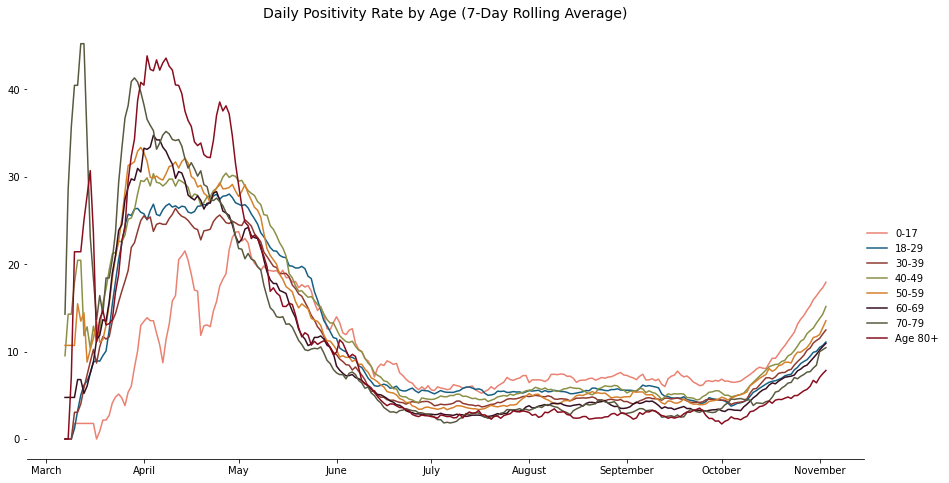

In [57]:
# Plotting positivity rate by age
make_line_plot(vars_list = list(testing.columns[-13:-5]),
    dataframe = testing,
    title = 'Daily Positivity Rate by Age (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79', 'Age 80+'])

<ipython-input-32-9e0c1359b27f>:21: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


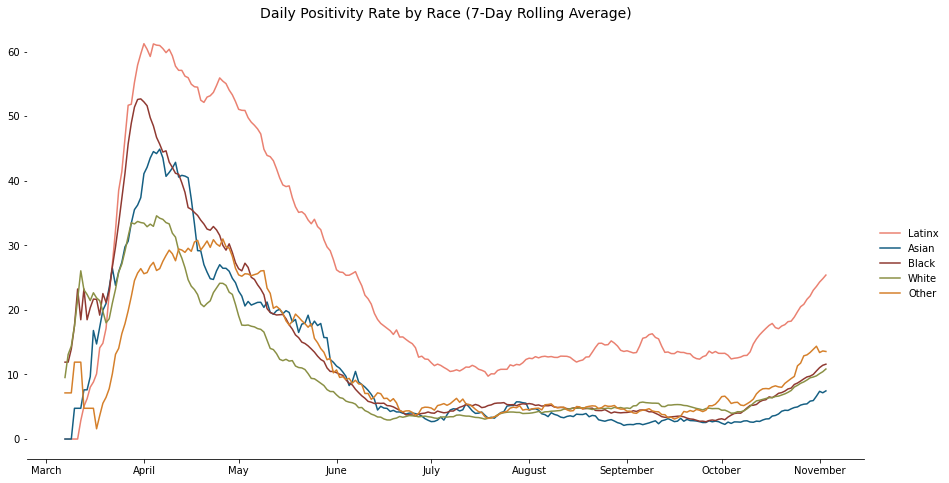

In [58]:
# Plotting positivity rate by race
make_line_plot(vars_list = list(testing.columns[-5:]),
    dataframe = testing,
    title = 'Daily Positivity Rate by Race (7-Day Rolling Average)',
    dist = .8,
    var_labels = ['Latinx', 'Asian', 'Black', 'White', 'Other'])

## Time-Series Modeling

For the time series analysis, I'll be modeling positivity rates given their importance in policy-making. 

In [59]:
# Defining metrics 
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [60]:
def non_sarima_plots(vars_list, var_labels, title, dist):
    fig, ax = plt.subplots(figsize=(15,8))
    fig.patch.set_facecolor('white')

    colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
            '#a2755e']

    var_handles = []
    for i in range(len(vars_list)):
        var_handles.append(ax.plot(vars_list[i], color = colors[i]))

    spine_position = ['top', 'left', 'right']
    for spine in spine_position:    
        ax.spines[spine].set_color('white')

    ax.set_title(title, fontsize=14)

    ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
    plt.show()

In [61]:
# Creating function to plot actual vs predicted
def forecast_plot(vars_list, var_labels, title, dist, min):
    fig, ax = plt.subplots(figsize=(15,8))
    fig.patch.set_facecolor('white')

    colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
            '#a2755e']

    var_handles = []
    for i in range(len(vars_list)):
        var_handles.append(ax.plot(vars_list[i], color = colors[i]))

    ax.fill_between(lower_series.index, 
                 min, 
                 upper_series, 
                 color='k', alpha=.05)

    spine_position = ['top', 'left', 'right']
    for spine in spine_position:    
        ax.spines[spine].set_color('white')

    ax.set_title(title, fontsize=14)

    ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
    plt.show()

## Naive Model

In [118]:
# Creating testing and training sets
train = testing.loc[:'2020-10-20', 'posRate']*100
test = testing.loc['2020-10-20':'2020-11-03', 'posRate']*100

In [119]:
naive = pd.Series([train[len(train)-1] for i in range(len(test))])
naive.index = test.index

<ipython-input-60-eb2cab746153>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


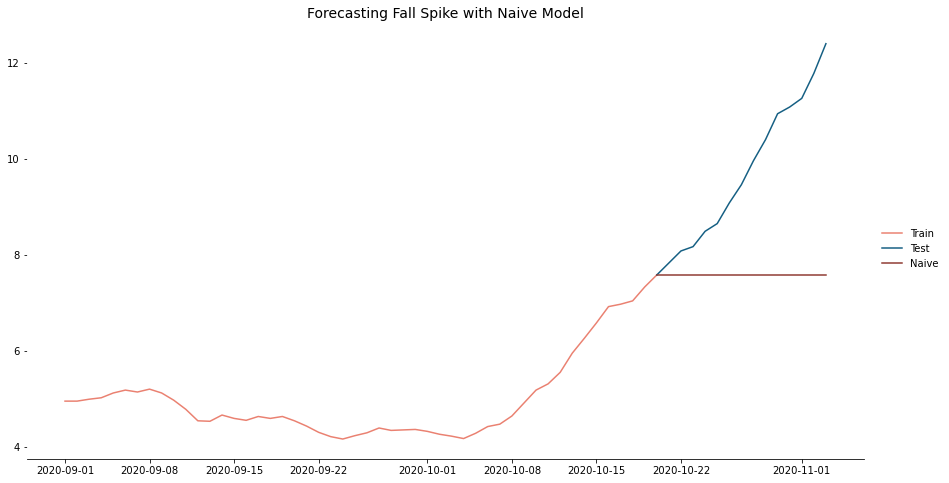

In [120]:
non_sarima_plots(vars_list =[train['2020-09-01':], test, naive],
                          var_labels = ['Train', 'Test','Naive'],
                          title = 'Forecasting Fall Spike with Naive Model',
                          dist=.8)

In [121]:
naive_metrics = forecast_accuracy(naive, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [122]:
naive_metrics

{'mape': 0.19773532691367218,
 'me': -2.097333333333333,
 'mae': 2.097333333333333,
 'mpe': -0.19773532691367218,
 'rmse': 2.5818494663064038,
 'acf1': 0.7964524525340858,
 'corr': -7.865019908277972e-17,
 'minmax': 0.19773532691367213}

## Moving Average Model

In [123]:
moving_avg = pd.Series(train.rolling(7).mean()[-1] for i in range(len(test)))
moving_avg.index = test.index

<ipython-input-60-eb2cab746153>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


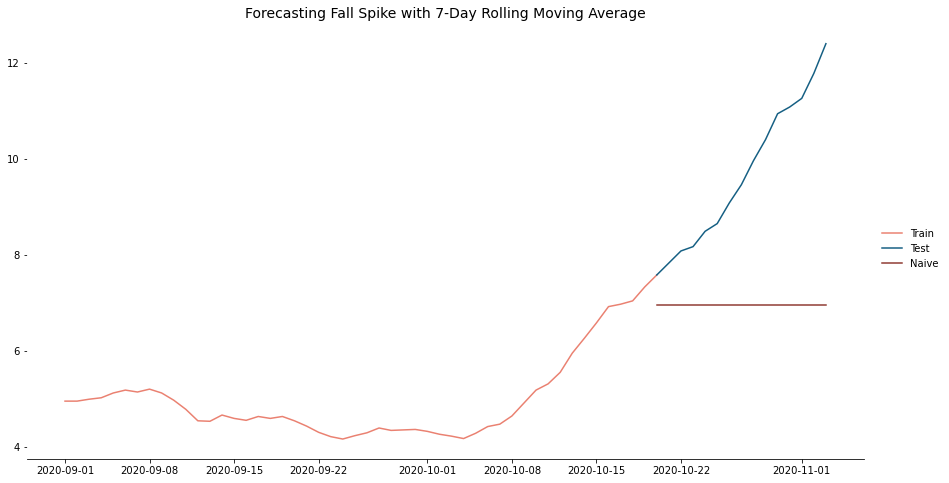

In [124]:
non_sarima_plots(vars_list =[train['2020-09-01':], test, moving_avg],
                          var_labels = ['Train', 'Test','Naive'],
                          title = 'Forecasting Fall Spike with 7-Day Rolling Moving Average',
                          dist=.8)

In [125]:
moving_metrics = forecast_accuracy(moving_avg, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [126]:
moving_metrics

{'mape': 0.2639607183218546,
 'me': -2.723047619047626,
 'mae': 2.723047619047626,
 'mpe': -0.2639607183218546,
 'rmse': 3.1116117834904307,
 'acf1': 0.7964524525340859,
 'corr': -7.865019908277972e-17,
 'minmax': 0.2639607183218545}

## Triple Exponential Smoothing Model

In [127]:
# Triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# create class
smoothing_model = ExponentialSmoothing(train, trend='add', damped=False).fit(optimized=True)
# make prediction
smoothed = smoothing_model.forecast(len(test))

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<ipython-input-60-eb2cab746153>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


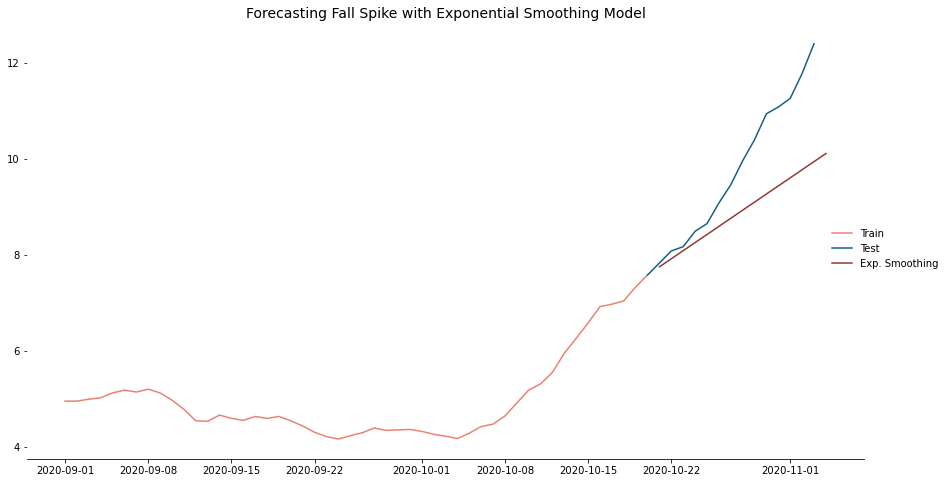

In [128]:
non_sarima_plots(vars_list =[train['2020-09-01':], test, smoothed],
                          var_labels = ['Train', 'Test','Exp. Smoothing'],
                          title = 'Forecasting Fall Spike with Exponential Smoothing Model',
                          dist=.8)

In [129]:
smoothing_metrics = forecast_accuracy(smoothed, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [130]:
smoothing_metrics

{'mape': 0.09056197533530268,
 'me': -0.9818888798564863,
 'mae': 0.9818888798564863,
 'mpe': -0.09056197533530268,
 'rmse': 1.2519541530852203,
 'acf1': nan,
 'corr': 0.991077486983104,
 'minmax': 0.07256206218544725}

## SARIMA Model

In [131]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel_1 = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_d = 3, max_q=3, m=7,
                         max_P=3, max_D=3, max_Q=3,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_1.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=586.091, Time=0.66 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=646.182, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=596.069, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=589.623, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=635.224, Time=0.06 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=582.067, Time=0.52 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=597.739, Time=0.11 sec
 ARIMA(1,1,1)(2,1,1)[7]             : AIC=583.942, Time=1.16 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=583.725, Time=1.20 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=581.726, Time=0.57 sec
 ARIMA(1,1,1)(0,1,3)[7]             : AIC=583.725, Time=1.49 sec
 ARIMA(1,1,1)(1,1,3)[7]             : AIC=585.181, Time=2.21 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=587.105, Time=0.18 sec
 ARIMA(1,1,0)(0,1,2)[7]             : AIC=588.180, Time=0.20 sec
 ARIMA(2,1,1)(0,1,2)[7]             : AIC=inf, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  234
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 7)   Log Likelihood                -285.863
Date:                                Mon, 16 Nov 2020   AIC                            581.726
Time:                                        23:45:25   BIC                            598.828
Sample:                                             0   HQIC                           588.628
                                                - 234                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9824      0.034     28.803      0.000       0.916       1.049
ma.L1         -0.8625      0.045    -19.195      0.000      -0.951      -0.774
ma.S.L7       -1.2172      0.079    -15.445      0.000      -1.372      -1.063
ma.S.L14       0.3071      0.031      9.770      0.000       0.245       0.369
sigma2         0.6910      0.045     15.360      0.000       0.603       0.779
===================================================================================
Ljung-Box (Q):                      240.02   Jarque-Bera (JB):             10602.31
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -4.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [132]:
# Forecast
n_periods = len(test)
fc, confint = smodel_1.predict(n_periods=n_periods, return_conf_int=True)
index = test.index
# index = pd.date_range(test.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


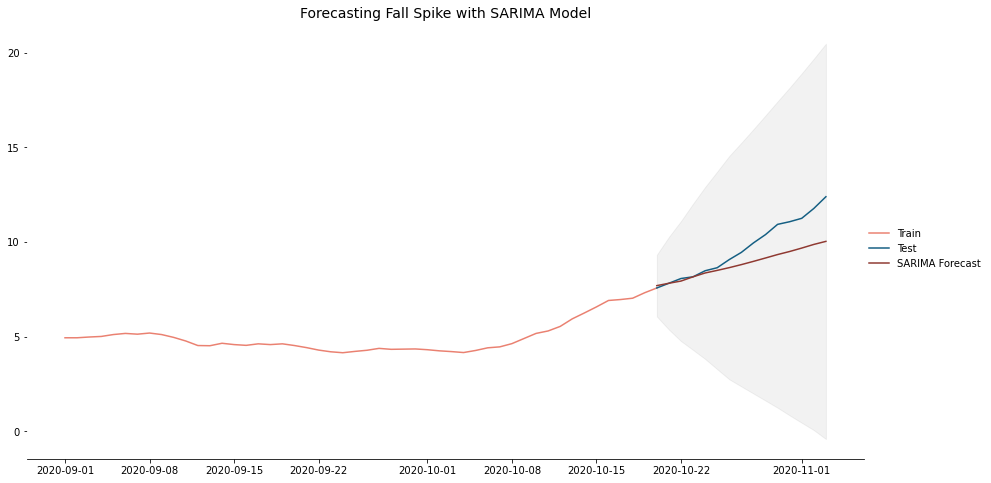

In [133]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMA Forecast'],
                          title = 'Forecasting Fall Spike with SARIMA Model',
                          dist=.85,
                          min=lower_series)

In [134]:
SARIMA_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [135]:
SARIMA_metrics

{'mape': 0.07826090082274421,
 'me': -0.8366198324507427,
 'mae': 0.8531693134614693,
 'mpe': -0.07607759198227897,
 'rmse': 1.1488748542662346,
 'acf1': 0.7820105951106636,
 'corr': 0.9915310204130681,
 'minmax': 0.07824331317662048}

## SARIMAX Model
Adding in variables for:
- Holidays
- Recovery Phases
- Temperature

In [185]:
testing.reset_index(inplace=True)

In [186]:
testing.Date = testing.Date.astype(str)

In [187]:
# Creating column for 5-day lag after holiday
conditions = [
    testing.Date=='2020-05-25',
    testing.Date=='2020-07-09',
    testing.Date=='2020-09-12',
    testing.Date=='2020-11-03'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_5'] = np.select(conditions, choices, default=0)

In [188]:
# Creating column for 7-day lag after holiday
conditions = [
    testing.Date=='2020-05-27',
    testing.Date=='2020-07-11',
    testing.Date=='2020-09-14',
    testing.Date=='2020-11-05'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_7'] = np.select(conditions, choices, default=0)

In [189]:
# Creating column for 10-day lag after holiday
conditions = [
    testing.Date=='2020-05-30',
    testing.Date=='2020-07-14',
    testing.Date=='2020-09-17',
    testing.Date=='2020-11-08'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_10'] = np.select(conditions, choices, default=0)

In [190]:
# Creating column for 14-day lag after holiday
conditions = [
    testing.Date=='2020-06-03',
    testing.Date=='2020-07-18',
    testing.Date=='2020-09-21',
    testing.Date=='2020-11-12'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_14'] = np.select(conditions, choices, default=0)

In [191]:
# Creating column for 15-day lag after holiday
conditions = [
    testing.Date=='2020-06-04',
    testing.Date=='2020-07-19',
    testing.Date=='2020-09-22',
    testing.Date=='2020-11-13'
]

choices = [
    1,
    1,
    1,
    1
]

testing['holiday_15'] = np.select(conditions, choices, default=0)

In [192]:
# Creating  recovery phases feature
conditions = [
    (testing.Date>='2020-03-16')&(testing.Date<='2020-04-30'),
    (testing.Date>='2020-05-01')&(testing.Date<='2020-06-04'),
    (testing.Date>='2020-06-05')&(testing.Date<='2020-06-25'),
    (testing.Date>='2020-06-26')&(testing.Date<='2020-07-23'),
    (testing.Date>='2020-07-24')&(testing.Date<='2020-09-30'),
    (testing.Date>='2020-10-01')&(testing.Date<='2020-10-22'),
    (testing.Date>='2020-10-23')&(testing.Date<='2020-11-03')
]

choices = [
    1,
    2,
    3,
    4,
    3,
    4,
    3 
]

testing['restrictions'] = np.select(conditions, choices, default=0)

In [193]:
# Creating columns for precipitation and average daily temperature
# import weather data
weather = pd.read_csv('weather2.csv')

# Using Chicago Ohare data due to completeness
weather = weather[weather.NAME=='CHICAGO OHARE INTERNATIONAL AIRPORT, IL US'][['DATE', 'PRCP', 'TAVG']]

# Rename column for merging
weather.rename(columns={'DATE': 'Date'},inplace=True)

In [194]:
# Manually filling in missing information with historical data
weather = weather.append(pd.DataFrame([{'Date': '2020-11-05', 'PRCP': 0.00, 'TAVG': 63.5},
 {'Date': '2020-11-06', 'PRCP': 0.00, 'TAVG': 60.5},
 {'Date': '2020-11-07', 'PRCP': 0.00, 'TAVG': 66.0}]))

In [195]:
# Creating lagged temperature
weather['TAVG_5'] = weather.TAVG.shift(5)
weather['TAVG_7'] = weather.TAVG.shift(7)
weather['TAVG_10'] = weather.TAVG.shift(10)
weather['TAVG_14'] = weather.TAVG.shift(14)
weather['TAVG_15'] = weather.TAVG.shift(15)

# Creating lagged precipitation
weather['PRCP_5'] = weather.PRCP.shift(5)
weather['PRCP_7'] = weather.PRCP.shift(7)
weather['PRCP_10'] = weather.PRCP.shift(10)
weather['PRCP_14'] = weather.PRCP.shift(14)
weather['PRCP_15'] = weather.PRCP.shift(15)

In [196]:
weather

,Date,PRCP,TAVG,TAVG_5,TAVG_7,TAVG_10,TAVG_14,TAVG_15,PRCP_5,PRCP_7,PRCP_10,PRCP_14,PRCP_15
30660,2020-02-01,0.01,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30661,2020-02-02,0.00,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30662,2020-02-03,0.00,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30663,2020-02-04,0.00,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30664,2020-02-05,0.07,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30936,2020-11-03,0.00,50.0,45.0,36.0,41.0,43.0,42.0,0.0,0.03,0.00,0.19,0.05
30937,2020-11-04,0.00,58.0,37.0,39.0,42.0,51.0,43.0,0.0,0.00,0.00,0.38,0.19
0,2020-11-05,0.00,63.5,41.0,45.0,38.0,55.0,51.0,0.0,0.00,0.06,1.67,0.38
1,2020-11-06,0.00,60.5,45.0,37.0,36.0,61.0,55.0,0.0,0.00,0.03,0.65,1.67


In [197]:
testing = pd.merge(testing, weather, on='Date')

In [198]:
testing.Date = pd.to_datetime(testing.Date)

In [199]:
testing.set_index('Date', inplace=True)

In [200]:
testing.head()

,Day,Positive Tests,Not Positive Tests,Total Tests,Tests - Age 0-17,Tests - Age 18-29,Tests - Age 30-39,Tests - Age 40-49,Tests - Age 50-59,Tests - Age 60-69,Tests - Age 70-79,Tests - Age 80+,Tests - Age Unknown,Tests - Female,Tests - Male,Tests - Gender Unknown,Tests - Latinx,Tests - Asian Non-Latinx,Tests - Black Non-Latinx,Tests - White Non-Latinx,Tests - Other Race Non-Latinx,Tests - Unknown Race/Ethnicity,Positive Tests - Age 0-17,Positive Tests - Age 18-29,Positive Tests - Age 30-39,Positive Tests - Age 40-49,Positive Tests - Age 50-59,Positive Tests - Age 60-69,Positive Tests - Age 70-79,Positive Tests - Age 80+,Positive Tests - Age Unknown,Positive Tests - Female,Positive Tests - Male,Positive Tests - Unknown Gender,Positive Tests - Latinx,Positive Tests - Asian Non-Latinx,Positive Tests - Black Non-Latinx,Positive Tests - White Non-Latinx,Positive Tests - Other Race Non-Latinx,Positive Tests - Unknown Race/Ethnicity,Not-Positive Tests - Age 0-17,Not-Positive Tests - Age 18-29,Not-Positive Tests - Age 30-39,Not-Positive Tests - Age 40-49,Not-Positive Tests - Age 50-59,Not-Positive Tests - Age 60-69,Not-Positive Tests - Age 70-79,Not-Positive Tests - Age 80+,Not-Positive Tests - Age Unknown,Not-Positive Tests - Female,Not-Positive Tests - Male,Not-Positive Tests - Gender Unknown,Not-Positive Tests - Latinx,Not-Positive Tests - Asian Non-Latinx,Not-Positive Tests - Black Non-Latinx,Not-Positive Tests - White Non-Latinx,Not-Positive Tests - Other Race Non-Latinx,Not-Positive Tests - Unknown Race/Ethnicity,posRate,0-17_posRate,18-29_posRate,30-39_posRate,40-49_posRate,50-59_posRate,60-69_posRate,70-79_posRate,Age 80+_posRate,Latinx_posRate,Asian_posRate,Black_posRate,White_posRate,Other_posRate,holiday_5,holiday_7,holiday_10,holiday_14,holiday_15,restrictions,PRCP,TAVG,TAVG_5,TAVG_7,TAVG_10,TAVG_14,TAVG_15,PRCP_5,PRCP_7,PRCP_10,PRCP_14,PRCP_15
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,Sunday,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0.0,41.0,38.0,43.0,19.0,30.0,18.0,0.06,0.00,0.0,0.00,0.00
2020-03-02,Monday,0,5,5,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,0,0,0,0,3,2,0,2,1,0,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0.0,46.0,31.0,41.0,21.0,35.0,30.0,0.10,0.00,0.0,0.13,0.00
2020-03-03,Tuesday,0,9,9,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1,0,0,1,1,0,0,4,5,0,2,2,1,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0.0,38.0,27.0,38.0,36.0,37.0,35.0,0.00,0.06,0.0,0.00,0.13
2020-03-04,Wednesday,0,11,11,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,4,0,2,0,0,5,6,0,0,1,1,3,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0.0,42.0,24.0,31.0,43.0,25.0,37.0,0.00,0.10,0.0,0.00,0.00
2020-03-05,Thursday,1,12,13,0,2,0,3,4,2,1,1,0,3,10,0,2,0,3,2,0,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,3,3,2,1,1,0,2,10,0,2,0,2,2,0,6,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.0,0,0,0,0,0,0,0.0,42.0,26.0,27.0,41.0,19.0,25.0,0.00,0.00,0.0,0.00,0.00


## Modeling
I've incorporated holiday, restrictions (for each of the recovery phases in Chicago), daily precipitation, and average daily temperature. I've created lagged features assuming that any cases resulting from a particular event will not be detected until at least 5 days later, on average. I also include and 10 day and 15 day lag as well.

## Lag 5

In [202]:
# SARIMAX Model with 5-day lag
sxmodel = pm.auto_arima(train, exogenous=testing[['holiday_5', 'restrictions', 'PRCP_5', 'TAVG_5']].iloc[:-14,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=605.207, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1210.437, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=618.592, Time=0.83 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=931.470, Time=0.65 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1209.707, Time=0.15 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=647.455, Time=0.57 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=603.171, Time=1.06 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=609.391, Time=1.01 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=605.803, Time=1.88 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=605.345, Time=1.94 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=602.863, Time=1.76 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=610.521, Time=1.53 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=598.029, Time=1.74 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=596.081

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  234
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -288.041
Date:                           Mon, 16 Nov 2020   AIC                            596.081
Time:                                   23:55:43   BIC                            630.331
Sample:                               03-01-2020   HQIC                           609.902
                                    - 10-20-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0069      0.033      0.211      0.833      -0.057       0.071
holiday_5       -0.1171      0.555     -0.211      0.833      -1.206       0.971
restrictions    -0.1478      0.431     -0.343      0.732      -0.992       0.697
PRCP_5          -0.1029      0.115     -0.896      0.370      -0.328       0.122
TAVG_5           0.0041      0.011      0.372      0.710      -0.018       0.026
ar.L1            0.2535      0.037      6.917      0.000       0.182       0.325
ar.L2            0.7430      0.037     20.319      0.000       0.671       0.815
ma.L1            0.9891      0.094     10.527      0.000       0.805       1.173
ma.S.L7         -0.7084      0.041    -17.381      0.000      -0.788      -0.628
sigma2           0.7098      0.062     11.394      0.000       0.588       0.832
===================================================================================
Ljung-Box (Q):                       81.73   Jarque-Bera (JB):             24482.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -4.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        52.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [205]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_5', 'restrictions', 'PRCP_5', 'TAVG_5']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


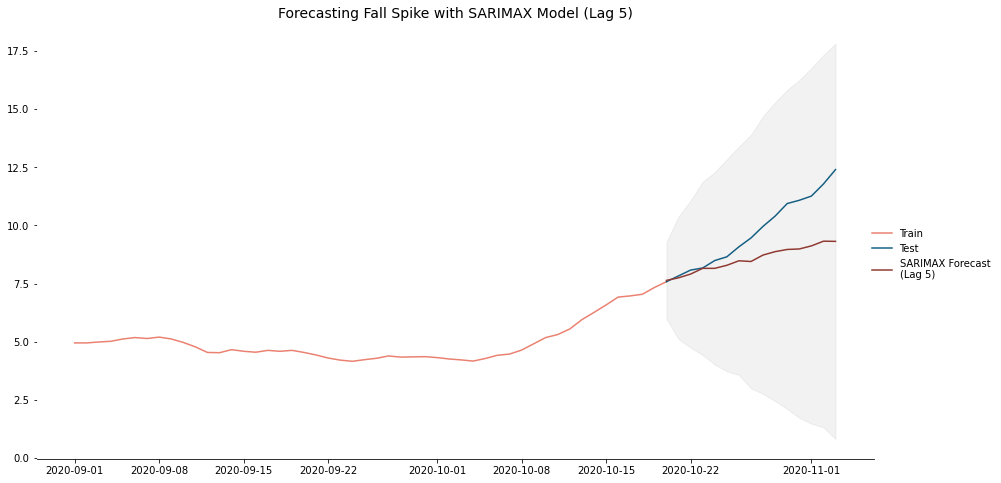

In [206]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 5)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 5)',
                          dist=.85,
                          min=lower_series)

In [207]:
SARIMAX_lag5_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [208]:
SARIMAX_lag5_metrics

{'mape': 0.10555501035745227,
 'me': -1.1357334741236278,
 'mae': 1.143242222036625,
 'mpe': -0.10456441036893022,
 'rmse': 1.5042539399863641,
 'acf1': 0.7791393702784015,
 'corr': 0.9811668549458287,
 'minmax': 0.10555135766387402}

## Lag 10

In [210]:
# SARIMAX Model with 10-day lag
sxmodel_2 = pm.auto_arima(train, exogenous=testing[['holiday_10', 'restrictions', 'PRCP_10', 'TAVG_10']].iloc[:-14,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_2.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=604.808, Time=1.06 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1206.812, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=618.808, Time=0.97 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=931.701, Time=0.89 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1206.349, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=645.732, Time=0.56 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=603.160, Time=1.16 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=609.310, Time=0.98 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=605.670, Time=1.89 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=605.210, Time=1.93 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=602.792, Time=1.81 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=913.571, Time=1.61 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=610.376, Time=1.52 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=603.365

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  234
Model:             SARIMAX(1, 0, 3)x(0, 1, [1], 7)   Log Likelihood                -284.714
Date:                             Mon, 16 Nov 2020   AIC                            589.427
Time:                                     23:58:31   BIC                            623.677
Sample:                                 03-01-2020   HQIC                           603.248
                                      - 10-20-2020                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_10       0.0218      0.905      0.024      0.981      -1.752       1.796
restrictions     0.0242      0.507      0.048      0.962      -0.970       1.018
PRCP_10         -0.0257      0.209     -0.123      0.902      -0.435       0.384
TAVG_10         -0.0051      0.011     -0.442      0.659      -0.028       0.017
ar.L1            0.9908      0.011     92.244      0.000       0.970       1.012
ma.L1            0.1637      0.033      5.036      0.000       0.100       0.227
ma.L2           -0.0178      0.046     -0.385      0.700      -0.108       0.073
ma.L3            0.4002      0.039     10.164      0.000       0.323       0.477
ma.S.L7         -0.8882      0.087    -10.243      0.000      -1.058      -0.718
sigma2           0.6847      0.055     12.442      0.000       0.577       0.793
===================================================================================
Ljung-Box (Q):                      144.65   Jarque-Bera (JB):              9252.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -2.67
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [211]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_2.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'restrictions', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


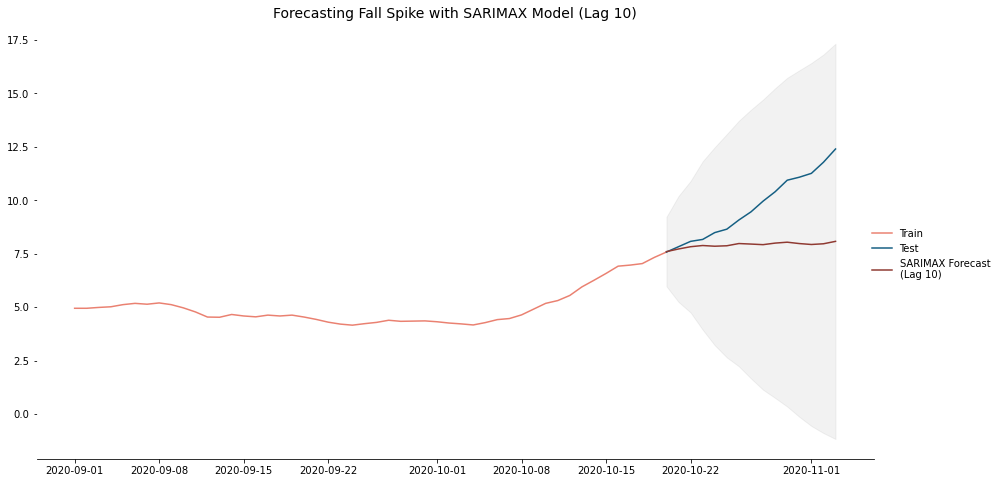

In [212]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10)',
                          dist=.85,
                          min=lower_series)

In [213]:
SARIMAX_lag10_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [214]:
SARIMAX_lag10_metrics

{'mape': 0.16503121780889662,
 'me': -1.7694782409368963,
 'mae': 1.772221977241491,
 'mpe': -0.16466924732016378,
 'rmse': 2.263617008463365,
 'acf1': 0.8091880451309531,
 'corr': 0.8071489731675018,
 'minmax': 0.16503072780427053}

## Lag 15

In [216]:
# SARIMAX Model with 15-day lag
sxmodel_3 = pm.auto_arima(train, exogenous=testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].iloc[:-14,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_3.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=605.409, Time=0.97 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1210.771, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=618.944, Time=0.90 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=928.625, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1210.249, Time=0.19 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=647.830, Time=0.62 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=603.486, Time=1.10 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=609.720, Time=0.85 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=605.995, Time=1.85 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=608.783, Time=1.97 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=603.089, Time=1.79 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=907.764, Time=1.55 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=610.627, Time=1.53 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=596.444, Time=2.01 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=596

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  234
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2], 7)   Log Likelihood                -287.222
Date:                                Mon, 16 Nov 2020   AIC                            596.444
Time:                                        23:59:29   BIC                            634.119
Sample:                                    03-01-2020   HQIC                           611.646
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0094      0.043      0.220      0.826      -0.074       0.093
holiday_15      -0.2117      0.838     -0.253      0.801      -1.854       1.430
restrictions    -0.2236      0.507     -0.441      0.659      -1.217       0.770
PRCP_15         -0.0473      0.199     -0.238      0.811      -0.436       0.342
TAVG_15         -0.0040      0.014     -0.289      0.773      -0.031       0.023
ar.L1            0.2323      0.042      5.492      0.000       0.149       0.315
ar.L2            0.7645      0.043     17.843      0.000       0.681       0.849
ma.L1            0.9890      0.107      9.273      0.000       0.780       1.198
ma.S.L7         -0.7621      0.032    -23.450      0.000      -0.826      -0.698
ma.S.L14         0.1369      0.034      3.989      0.000       0.070       0.204
sigma2           0.7062      0.067     10.540      0.000       0.575       0.838
===================================================================================
Ljung-Box (Q):                       74.65   Jarque-Bera (JB):             25188.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -4.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [217]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_3.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


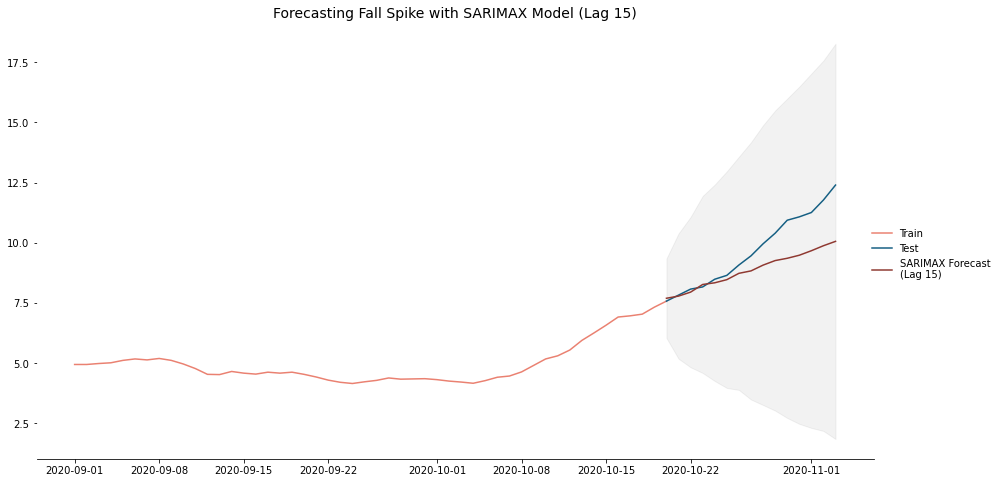

In [218]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 15)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 15)',
                          dist=.85,
                          min=lower_series)

In [219]:
SARIMAX_lag15_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [220]:
SARIMAX_lag15_metrics

{'mape': 0.07786138698411028,
 'me': -0.817195929179941,
 'mae': 0.8467043318840087,
 'mpe': -0.07409796012071372,
 'rmse': 1.1343615705517773,
 'acf1': 0.7812554932449803,
 'corr': 0.9889220602355885,
 'minmax': 0.0778348586491191}

In [222]:
models = [naive_metrics, moving_metrics, smoothing_metrics, SARIMA_metrics, SARIMAX_lag5_metrics,
          SARIMAX_lag10_metrics, SARIMAX_lag15_metrics]
model_names = ['Naive Model', 'Moving Average Model', 'Triple Exponential Smoothing', 'SARIMA', 'SARIMAX (Lag 5)',
               'SARIMAX (Lag 10)', 'SARIMAX (Lag 15)']

In [223]:
model_comparisons = []
for i in range(len(models)):
    model_comparisons.append({'model_name': model_names[i], 'rmse': models[i]['rmse']})

results = pd.DataFrame(model_comparisons)

In [224]:
results

,model_name,rmse
0,Naive Model,2.581849
1,Moving Average Model,3.111612
2,Triple Exponential Smoothing,1.251954
3,SARIMA,1.148875
4,SARIMAX (Lag 5),1.504254
5,SARIMAX (Lag 10),2.263617
6,SARIMAX (Lag 15),1.134362


## Testing Weekly Lags (7 & 14)

In [225]:
# SARIMAX Model with 7-day lag
sxmodel_4 = pm.auto_arima(train, exogenous=testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].iloc[:-14,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_4.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=605.318, Time=0.98 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1210.755, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=618.938, Time=0.89 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=931.145, Time=0.78 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1210.254, Time=0.13 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=647.464, Time=0.56 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=603.124, Time=0.99 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=609.885, Time=0.93 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=605.024, Time=1.92 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=602.065, Time=1.71 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=608.860, Time=1.46 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=597.659, Time=1.82 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  234
Model:             SARIMAX(3, 0, 1)x(0, 1, [1, 2], 7)   Log Likelihood                -286.551
Date:                                Tue, 17 Nov 2020   AIC                            597.103
Time:                                        00:01:31   BIC                            638.202
Sample:                                    03-01-2020   HQIC                           613.687
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0135      0.051      0.263      0.792      -0.087       0.114
holiday_7       -0.0316      0.883     -0.036      0.971      -1.761       1.698
restrictions    -0.1046      0.687     -0.152      0.879      -1.451       1.241
PRCP_7          -0.0320      0.192     -0.166      0.868      -0.409       0.345
TAVG_7           0.0105      0.012      0.911      0.362      -0.012       0.033
ar.L1            0.2605      0.044      5.917      0.000       0.174       0.347
ar.L2            0.8254      0.057     14.366      0.000       0.713       0.938
ar.L3           -0.0905      0.060     -1.519      0.129      -0.207       0.026
ma.L1            0.9807      0.067     14.578      0.000       0.849       1.113
ma.S.L7         -0.8824      0.037    -23.769      0.000      -0.955      -0.810
ma.S.L14         0.2787      0.041      6.802      0.000       0.198       0.359
sigma2           0.6914      0.049     14.022      0.000       0.595       0.788
===================================================================================
Ljung-Box (Q):                       96.95   Jarque-Bera (JB):             15601.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -4.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [226]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_4.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


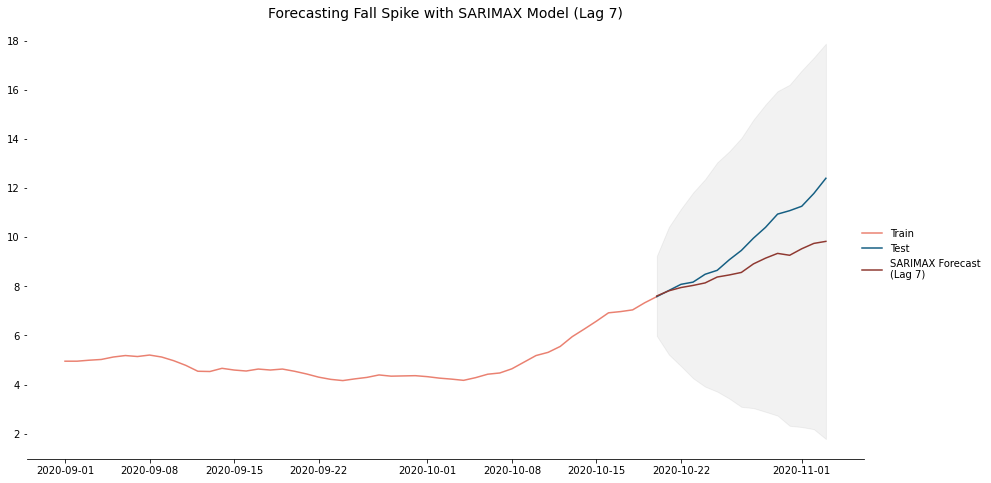

In [227]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7)',
                          dist=.85,
                          min=lower_series)

In [228]:
SARIMAX_lag7_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [229]:
SARIMAX_lag7_metrics

{'mape': 0.08955303715046854,
 'me': -0.9630062006757035,
 'mae': 0.966509517003215,
 'mpe': -0.08909085821544065,
 'rmse': 1.25665756113234,
 'acf1': 0.7726882306546865,
 'corr': 0.9932712594930875,
 'minmax': 0.08955223888240882}

In [230]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 7)', 'rmse': SARIMAX_lag7_metrics['rmse']})

## Lag 14

In [231]:
# SARIMAX Model with 7-day lag
sxmodel_5 = pm.auto_arima(train, exogenous=testing[['holiday_14', 'restrictions', 'PRCP_14', 'TAVG_14']].iloc[:-14,:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_5.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=600.345, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1210.366, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=614.478, Time=0.76 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=929.556, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1209.837, Time=0.25 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=645.811, Time=0.73 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=596.450, Time=1.21 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=604.041, Time=0.89 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=598.806, Time=1.72 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=593.847, Time=1.82 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=595.010, Time=1.70 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=595.838, Time=2.34 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=879.474, Time=1.81 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=591.140

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  234
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood                -283.570
Date:                                Tue, 17 Nov 2020   AIC                            591.140
Time:                                        00:03:58   BIC                            632.239
Sample:                                    03-01-2020   HQIC                           607.724
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0177      0.037      0.483      0.629      -0.054       0.089
holiday_14      -0.1405      0.563     -0.250      0.803      -1.244       0.963
restrictions    -0.0893      0.546     -0.164      0.870      -1.159       0.980
PRCP_14         -0.1106      0.149     -0.744      0.457      -0.402       0.181
TAVG_14          0.0299      0.010      3.049      0.002       0.011       0.049
ar.L1            0.4526      0.157      2.877      0.004       0.144       0.761
ar.L2            0.5368      0.160      3.353      0.001       0.223       0.851
ma.L1            0.7547      0.132      5.728      0.000       0.496       1.013
ar.S.L7          0.4740      0.081      5.877      0.000       0.316       0.632
ma.S.L7         -1.5001      0.135    -11.122      0.000      -1.764      -1.236
ma.S.L14         0.8438      0.132      6.380      0.000       0.585       1.103
sigma2           0.6534      0.072      9.055      0.000       0.512       0.795
===================================================================================
Ljung-Box (Q):                      113.95   Jarque-Bera (JB):              8017.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            -3.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [232]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_5.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_14', 'restrictions', 'PRCP_14', 'TAVG_14']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


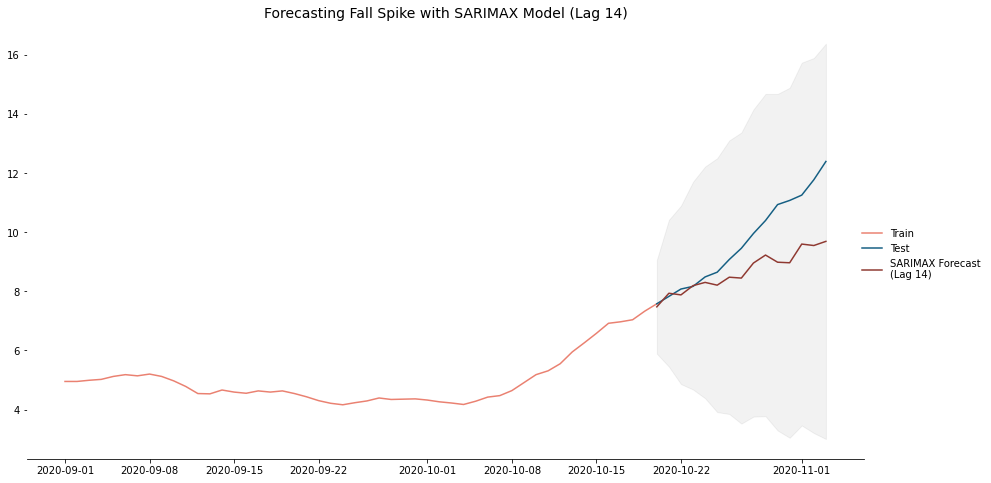

In [233]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 14)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 14)',
                          dist=.85,
                          min=lower_series)

In [234]:
SARIMAX_lag14_metrics = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [235]:
SARIMAX_lag14_metrics

{'mape': 0.09577279840752165,
 'me': -1.0151847112915704,
 'mae': 1.032716404815555,
 'mpe': -0.09355112278632861,
 'rmse': 1.3498540661541534,
 'acf1': 0.7639816185718594,
 'corr': 0.9620072637705828,
 'minmax': 0.09575992273649925}

In [236]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 14)', 'rmse': SARIMAX_lag14_metrics['rmse']})

In [237]:
pd.DataFrame(model_comparisons)

,model_name,rmse
0,Naive Model,2.581849
1,Moving Average Model,3.111612
2,Triple Exponential Smoothing,1.251954
3,SARIMA,1.148875
4,SARIMAX (Lag 5),1.504254
5,SARIMAX (Lag 10),2.263617
6,SARIMAX (Lag 15),1.134362
7,SARIMAX (Lag 7),1.256658
8,SARIMAX (Lag 14),1.349854


## Tweaking model training period for best performing models

### Lag 15

In [238]:
# SARIMAX Model with 15-day lag
sxmodel_6 = pm.auto_arima(train.loc['2020-07-01':], exogenous=testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].loc['2020-07-01':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_6.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=-163.347, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-92.175, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-132.223, Time=0.64 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=-146.338, Time=0.53 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=-108.943, Time=0.20 sec
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=-162.525, Time=0.73 sec
 ARIMA(1,1,1)(0,1,2)[7]             : AIC=-161.411, Time=0.86 sec
 ARIMA(1,1,1)(1,1,0)[7]             : AIC=-132.052, Time=0.55 sec
 ARIMA(1,1,1)(1,1,2)[7]             : AIC=inf, Time=0.96 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.46 sec
 ARIMA(2,1,1)(0,1,1)[7]             : AIC=-157.902, Time=0.66 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=-119.872, Time=0.33 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=-150.108, Time=0.65 sec
 ARIMA(2,1,0)(0,1,1)[7]             : AIC=-160.67

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  112
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood                  89.673
Date:                           Tue, 17 Nov 2020   AIC                           -163.347
Time:                                   00:06:24   BIC                           -142.192
Sample:                               07-01-2020   HQIC                          -154.776
                                    - 10-20-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_15      -0.0319      0.038     -0.844      0.399      -0.106       0.042
restrictions    -0.0509      0.149     -0.340      0.734      -0.344       0.242
PRCP_15          0.0078      0.023      0.341      0.733      -0.037       0.052
TAVG_15          0.0002      0.002      0.128      0.898      -0.003       0.004
ar.L1            0.8833      0.090      9.848      0.000       0.708       1.059
ma.L1           -0.4393      0.140     -3.147      0.002      -0.713      -0.166
ma.S.L7         -0.9317      0.328     -2.840      0.005      -1.575      -0.289
sigma2           0.0092      0.003      3.350      0.001       0.004       0.015
===================================================================================
Ljung-Box (Q):                       34.19   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.73   Prob(JB):                         0.71
Heteroskedasticity (H):               0.98   Skew:                             0.16
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [239]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_6.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


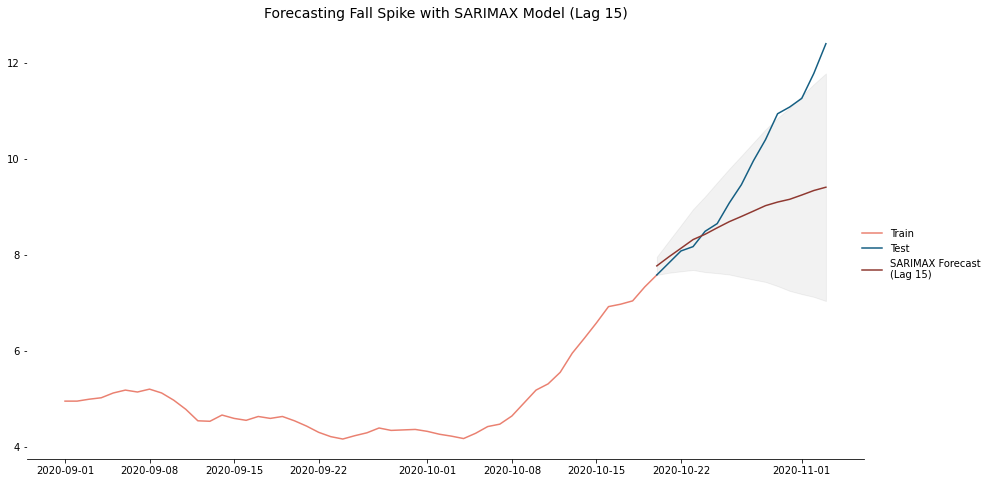

In [240]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 15)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 15)',
                          dist=.85,
                          min=lower_series)

In [241]:
SARIMAX_lag15_metrics_v2 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [242]:
SARIMAX_lag15_metrics_v2

{'mape': 0.09354507368120085,
 'me': -0.9544006316979493,
 'mae': 1.023692598902454,
 'mpe': -0.08472313223227491,
 'rmse': 1.4076054871752395,
 'acf1': 0.7927407765559501,
 'corr': 0.9647137626335018,
 'minmax': 0.09346290170541294}

In [243]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 15) - Shorter Train', 'rmse': SARIMAX_lag15_metrics_v2['rmse']})

## Lag 7

In [244]:
# SARIMAX Model with 15-day lag
sxmodel_7 = pm.auto_arima(train.loc['2020-07-01':], exogenous=testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].loc['2020-07-01':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_7.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-92.476, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-131.938, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=-143.436, Time=0.59 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=-104.862, Time=0.26 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=-141.334, Time=0.85 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=-125.436, Time=0.46 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=-119.728, Time=0.33 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,1,1)[7]             : AIC=inf, Time=0.50 sec
 ARIMA(1,1,2)(0,1,1)[7]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=-146.688, Time=0.59 sec
 ARIMA(0,1,1)(0,1,0)[7] intercept   : AIC=-103.730, Time=0.25 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  112
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 7)   Log Likelihood                  92.946
Date:                           Tue, 17 Nov 2020   AIC                           -165.892
Time:                                   00:07:58   BIC                           -139.448
Sample:                               07-01-2020   HQIC                          -155.179
                                    - 10-20-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_7        0.0413      0.049      0.845      0.398      -0.054       0.137
restrictions    -0.0635      0.107     -0.594      0.552      -0.273       0.146
PRCP_7           0.0043      0.026      0.163      0.870      -0.047       0.056
TAVG_7          -0.0008      0.002     -0.492      0.623      -0.004       0.002
ar.L1            0.8288      0.079     10.451      0.000       0.673       0.984
ma.L1           -0.3560      0.147     -2.419      0.016      -0.645      -0.068
ar.S.L7         -0.4337      0.184     -2.353      0.019      -0.795      -0.072
ar.S.L14        -0.4658      0.132     -3.533      0.000      -0.724      -0.207
ma.S.L7         -0.6382      0.203     -3.144      0.002      -1.036      -0.240
sigma2           0.0086      0.001      6.887      0.000       0.006       0.011
===================================================================================
Ljung-Box (Q):                       24.85   Jarque-Bera (JB):                 6.51
Prob(Q):                              0.97   Prob(JB):                         0.04
Heteroskedasticity (H):               1.48   Skew:                             0.55
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [245]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_7.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'restrictions', 'PRCP_7', 'TAVG_7']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


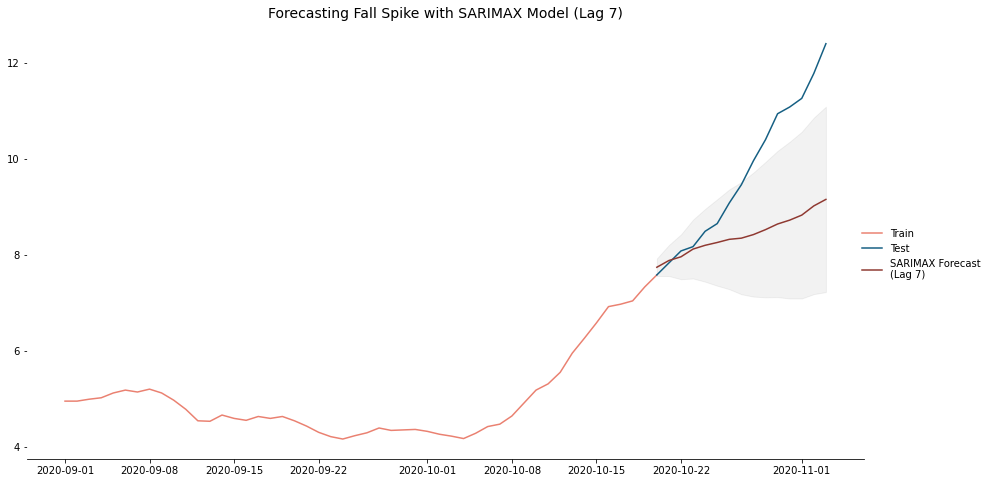

In [246]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7)',
                          dist=.85,
                          min=lower_series)

In [247]:
SARIMAX_lag7_metrics_v2 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [248]:
SARIMAX_lag7_metrics_v2

{'mape': 0.11998166710241565,
 'me': -1.2685131358770572,
 'mae': 1.296589484252205,
 'mpe': -0.11630604250070228,
 'rmse': 1.6910880161941617,
 'acf1': 0.8095336535745646,
 'corr': 0.9823049527175337,
 'minmax': 0.11994980356746321}

In [249]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - Shorter Train', 'rmse': SARIMAX_lag7_metrics_v2['rmse']})

## Lag 15 - Starting April 15

In [250]:
# SARIMAX Model with 15-day lag
sxmodel_8 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].loc['2020-04-15':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_8.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=41.755, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=681.846, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=81.735, Time=0.83 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=440.952, Time=0.86 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=708.770, Time=0.21 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=119.850, Time=0.56 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=32.059, Time=0.96 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=48.844, Time=0.88 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=36.421, Time=1.61 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=32.731, Time=1.70 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=34.285, Time=1.47 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=59.855, Time=1.59 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=29.192, Time=1.89 sec
 ARIMA(0,0,1)(2,1,2)[7] intercept   : AIC=408.278, Time=1.66 sec
 ARIMA(1,0,0)(2,1,2)[7] intercept   : AIC=inf, Time=1.59

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  189
Model:             SARIMAX(1, 0, 3)x(2, 1, [1, 2], 7)   Log Likelihood                   6.221
Date:                                Tue, 17 Nov 2020   AIC                             13.557
Time:                                        00:09:47   BIC                             55.209
Sample:                                    04-15-2020   HQIC                            30.442
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_15      -0.0658      0.112     -0.585      0.558      -0.286       0.155
restrictions    -0.0821      0.171     -0.479      0.632      -0.418       0.254
PRCP_15          0.0092      0.019      0.498      0.619      -0.027       0.046
TAVG_15         -0.0032      0.003     -1.104      0.270      -0.009       0.002
ar.L1            0.9854      0.012     81.547      0.000       0.962       1.009
ma.L1            0.5228      0.049     10.675      0.000       0.427       0.619
ma.L2            0.3649      0.072      5.056      0.000       0.223       0.506
ma.L3            0.1646      0.060      2.755      0.006       0.047       0.282
ar.S.L7         -0.3219      1.014     -0.318      0.751      -2.309       1.665
ar.S.L14        -0.0362      0.406     -0.089      0.929      -0.832       0.759
ma.S.L7         -0.6708      1.000     -0.671      0.502      -2.631       1.289
ma.S.L14         0.1311      0.616      0.213      0.832      -1.077       1.339
sigma2           0.0513      0.004     12.165      0.000       0.043       0.060
===================================================================================
Ljung-Box (Q):                       94.66   Jarque-Bera (JB):               348.95
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [251]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_8.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_15', 'restrictions', 'PRCP_15', 'TAVG_15']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


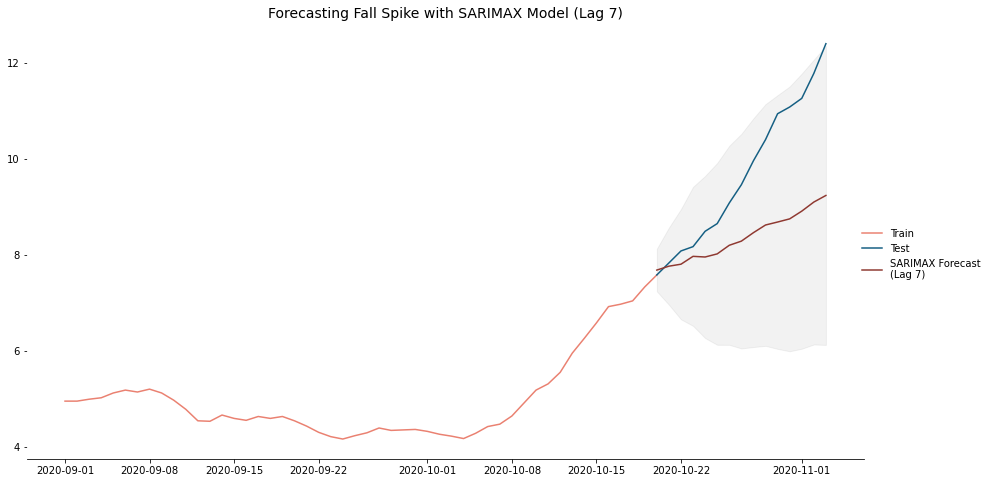

In [252]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7)',
                          dist=.85,
                          min=lower_series)

In [253]:
SARIMAX_lag15_metrics_v3 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [254]:
SARIMAX_lag15_metrics_v3

{'mape': 0.12453832672647154,
 'me': -1.315328233238889,
 'mae': 1.328827351179316,
 'mpe': -0.12275744045464738,
 'rmse': 1.6660375920520958,
 'acf1': 0.7918988090488932,
 'corr': 0.9958586650978242,
 'minmax': 0.12452659015306555}

In [255]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 15) - April 15', 'rmse': SARIMAX_lag15_metrics_v3['rmse']})

## Creating "tightening restrictions" and "loosening restricitons" features

In [256]:
testing.reset_index(inplace=True)

In [257]:
# Creating  recovery phases feature
conditions = [
    (testing.Date=='2020-03-16'),
    (testing.Date=='2020-07-24'),
    (testing.Date=='2020-10-23')
]

choices = [
    1,
    1,
    1
]

testing['tight_res'] = np.select(conditions, choices, default=0)

In [258]:
# Creating  recovery phases feature
conditions = [
    (testing.Date=='2020-05-01'),
    (testing.Date=='2020-06-05'),
    (testing.Date=='2020-06-26'),
    (testing.Date=='2020-10-01')
]

choices = [
    1,
    1,
    1,
    1
]

testing['loose_res'] = np.select(conditions, choices, default=0)

In [259]:
# Creating lagged tighening restrictions vars
testing['tight_res_5'] = testing.tight_res.shift(5)
testing['tight_res_7'] = testing.tight_res.shift(7)
testing['tight_res_10'] = testing.tight_res.shift(10)
testing['tight_res_14'] = testing.tight_res.shift(14)
testing['tight_res_15'] = testing.tight_res.shift(15)

# Creating lagged loosening restrictions vars
testing['loose_res_5'] = testing.loose_res.shift(5)
testing['loose_res_7'] = testing.loose_res.shift(7)
testing['loose_res_10'] = testing.loose_res.shift(10)
testing['loose_res_14'] = testing.loose_res.shift(14)
testing['loose_res_15'] = testing.loose_res.shift(15)

In [260]:
testing.iloc[:,-10:] = testing.iloc[:,-10:].replace(np.nan, 0)

In [261]:
testing.set_index('Date', inplace=True)

## Testing Restrictions (Lag 5)

In [262]:
# SARIMAX Model with no lag and starting on 4-15
sxmodel_9 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_5', 'tight_res_5', 'loose_res_5', 'PRCP_5', 'TAVG_5']].loc['2020-04-15':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_9.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=104.475, Time=1.15 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=706.470, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=79.875, Time=0.83 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=415.060, Time=0.75 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=739.946, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=150.256, Time=0.52 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=90.404, Time=1.69 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=104.176, Time=1.08 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=85.604, Time=1.10 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=561.620, Time=0.54 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=26.488, Time=0.84 sec
 ARIMA(2,0,0)(0,1,0)[7] intercept   : AIC=117.604, Time=0.54 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=64.224, Time=1.87 sec
 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=88.127, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  189
Model:             SARIMAX(3, 0, 0)x(1, 1, 0, 7)   Log Likelihood                  -0.138
Date:                           Tue, 17 Nov 2020   AIC                             20.275
Time:                                   00:11:54   BIC                             52.316
Sample:                               04-15-2020   HQIC                            33.264
                                    - 10-20-2020                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_5       0.0545      0.061      0.898      0.369      -0.064       0.173
tight_res_5    -0.1072      0.193     -0.557      0.578      -0.485       0.270
loose_res_5     0.1073      0.049      2.179      0.029       0.011       0.204
PRCP_5          0.0044      0.024      0.185      0.854      -0.042       0.051
TAVG_5          0.0016      0.003      0.570      0.569      -0.004       0.007
ar.L1           1.3955      0.057     24.424      0.000       1.284       1.508
ar.L2          -0.2627      0.115     -2.278      0.023      -0.489      -0.037
ar.L3          -0.1505      0.076     -1.982      0.048      -0.299      -0.002
ar.S.L7        -0.7553      0.025    -29.951      0.000      -0.805      -0.706
sigma2          0.0567      0.005     10.710      0.000       0.046       0.067
===================================================================================
Ljung-Box (Q):                       84.63   Jarque-Bera (JB):               218.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [263]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_9.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_5', 'tight_res_5', 'loose_res_5', 'PRCP_5', 'TAVG_5']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


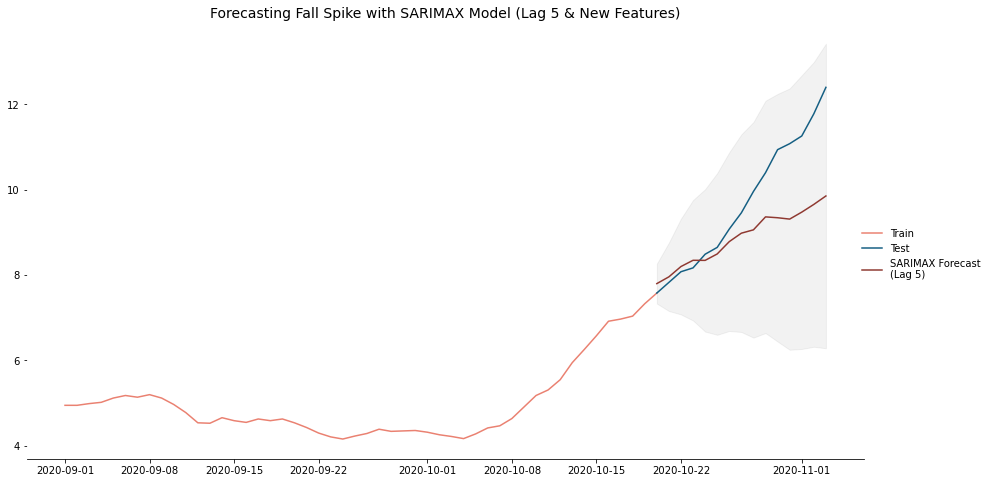

In [264]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 5)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 5 & New Features)',
                          dist=.85,
                          min=lower_series)

In [265]:
SARIMAX_lag5_metrics_v4 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [266]:
SARIMAX_lag5_metrics_v4

{'mape': 0.0826151241987067,
 'me': -0.8110838626968213,
 'mae': 0.8979010273267274,
 'mpe': -0.07159324543190636,
 'rmse': 1.21609475583579,
 'acf1': 0.7939849740918323,
 'corr': 0.9795623724785154,
 'minmax': 0.08249593986380832}

In [267]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 5) - April 15', 'rmse': SARIMAX_lag5_metrics_v4['rmse']})

## Testing Restrictions (Lag 10)

In [268]:
# SARIMAX Model with no lag and starting on 4-15
sxmodel_10 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].loc['2020-04-15':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_10.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=36.200, Time=0.96 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=696.372, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=76.657, Time=0.96 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=424.360, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=731.511, Time=0.16 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=120.459, Time=0.66 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=31.875, Time=1.03 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=42.476, Time=0.94 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=44.800, Time=1.64 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=30.545, Time=1.78 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=26.929, Time=1.63 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=402.126, Time=1.54 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=70.773, Time=1.43 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=62.551, Time=1.75 sec
 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=11.161, Time=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  189
Model:             SARIMAX(2, 0, 3)x(0, 1, [1, 2], 7)   Log Likelihood                  11.204
Date:                                Tue, 17 Nov 2020   AIC                              3.592
Time:                                        00:13:35   BIC                             45.244
Sample:                                    04-15-2020   HQIC                            20.477
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_10       0.0012      0.083      0.014      0.989      -0.161       0.163
tight_res_10    -0.0378      0.167     -0.226      0.821      -0.366       0.290
loose_res_10    -0.1418      0.053     -2.660      0.008      -0.246      -0.037
PRCP_10         -0.0313      0.027     -1.166      0.244      -0.084       0.021
TAVG_10       9.101e-05      0.003      0.030      0.976      -0.006       0.006
ar.L1            1.0964      0.373      2.941      0.003       0.366       1.827
ar.L2           -0.1179      0.366     -0.322      0.747      -0.835       0.600
ma.L1            0.4127      0.372      1.110      0.267      -0.316       1.141
ma.L2            0.2641      0.175      1.505      0.132      -0.080       0.608
ma.L3            0.1551      0.118      1.311      0.190      -0.077       0.387
ma.S.L7         -1.0673      0.073    -14.553      0.000      -1.211      -0.924
ma.S.L14         0.7361      0.091      8.061      0.000       0.557       0.915
sigma2           0.0471      0.005     10.067      0.000       0.038       0.056
===================================================================================
Ljung-Box (Q):                       90.00   Jarque-Bera (JB):               226.61
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [269]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_10.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


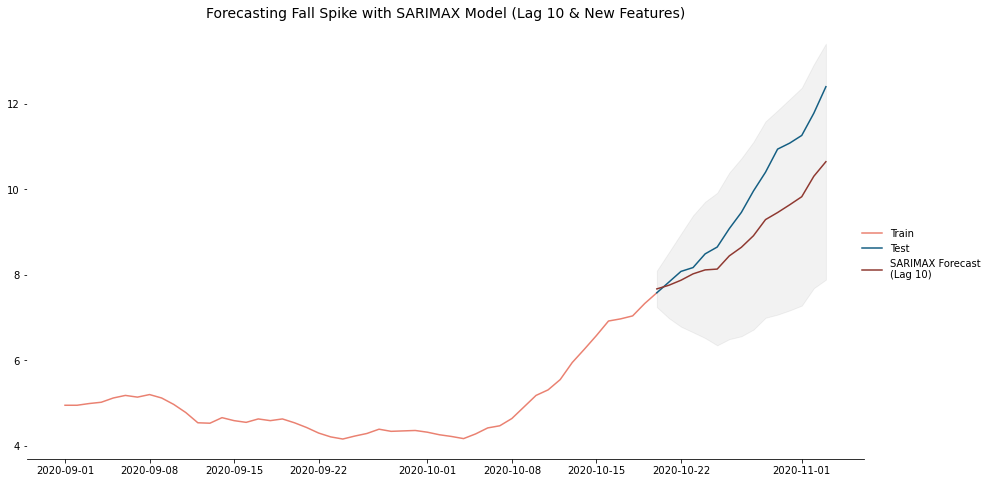

In [270]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10 & New Features)',
                          dist=.85,
                          min=lower_series)

In [271]:
SARIMAX_lag10_metrics_v4 = forecast_accuracy(fc_series, test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [272]:
SARIMAX_lag10_metrics_v4

{'mape': 0.07975706826406181,
 'me': -0.8280339257040169,
 'mae': 0.8401898121061098,
 'mpe': -0.0781533893191947,
 'rmse': 1.0152772169015243,
 'acf1': 0.7926521556426656,
 'corr': 0.995149065461918,
 'minmax': 0.07974753868387174}

In [273]:
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - April 15', 'rmse': SARIMAX_lag10_metrics_v4['rmse']})

## Testing Restrictions (Lag 15)

In [274]:
# SARIMAX Model with 15-day lag and starting on 4-15
sxmodel_11 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_15', 'tight_res_15', 'loose_res_15', 'PRCP_15', 'TAVG_15']].loc['2020-04-15':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_11.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=34.827, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=692.679, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=79.162, Time=0.86 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=424.789, Time=0.81 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=729.195, Time=0.11 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=121.736, Time=0.67 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=52.066, Time=1.12 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=31.116, Time=1.81 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=42.733, Time=1.84 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=392.904, Time=1.54 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=73.251, Time=1.36 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=64.011, Time=1.73 sec
 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=25.063, Time=1.63 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=25.987, Time=1.17 sec
 ARIMA(1,0,2)(1,1,2)[7] intercept   : AIC=31.670, Time=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  189
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 7)   Log Likelihood                   3.067
Date:                             Tue, 17 Nov 2020   AIC                             17.867
Time:                                     00:14:56   BIC                             56.315
Sample:                                 04-15-2020   HQIC                            33.453
                                      - 10-20-2020                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0099      0.019     -0.522      0.602      -0.047       0.027
holiday_15      -0.0343      0.107     -0.320      0.749      -0.245       0.176
tight_res_15     0.0599      0.400      0.150      0.881      -0.724       0.844
loose_res_15     0.0068      0.101      0.067      0.946      -0.192       0.205
PRCP_15          0.0026      0.019      0.132      0.895      -0.035       0.041
TAVG_15         -0.0027      0.003     -0.893      0.372      -0.009       0.003
ar.L1            0.9879      0.013     76.850      0.000       0.963       1.013
ma.L1            0.5395      0.045     11.892      0.000       0.451       0.628
ma.L2            0.2658      0.076      3.501      0.000       0.117       0.415
ar.S.L7         -0.3926      0.050     -7.881      0.000      -0.490      -0.295
ma.S.L7         -0.5558      0.108     -5.156      0.000      -0.767      -0.345
sigma2           0.0541      0.004     13.945      0.000       0.046       0.062
===================================================================================
Ljung-Box (Q):                      102.39   Jarque-Bera (JB):               444.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [275]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_11.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_15', 'tight_res_15', 'loose_res_15', 'PRCP_15', 'TAVG_15']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


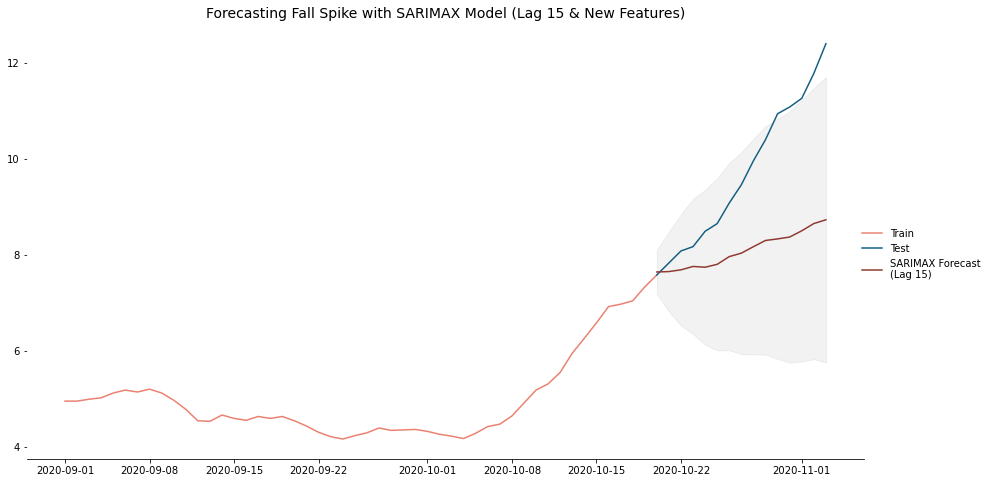

In [276]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 15)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 15 & New Features)',
                          dist=.85,
                          min=lower_series)

In [277]:
SARIMAX_lag15_metrics_v4 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 15) - April 15', 'rmse': SARIMAX_lag15_metrics_v4['rmse']})
SARIMAX_lag15_metrics_v4

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.15080365966931364,
 'me': -1.5890364944228708,
 'mae': 1.597247089304578,
 'mpe': -0.14972046773241296,
 'rmse': 1.9591592351252363,
 'acf1': 0.787258382193677,
 'corr': 0.9941449689884818,
 'minmax': 0.15079929523283597}

## Testing Restrictions (Lag 7)

In [278]:
# SARIMAX Model with 7-day lag and starting on 4-15
sxmodel_12 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].loc['2020-04-15':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_12.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=51.511, Time=0.99 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=703.982, Time=0.13 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=77.409, Time=0.86 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=417.259, Time=0.79 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=737.792, Time=0.14 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=122.112, Time=0.57 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=71.983, Time=1.12 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=41.512, Time=1.78 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=35.527, Time=1.98 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=391.836, Time=1.73 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=77.089, Time=1.58 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(1,0,2)(1,1,2)[7] intercept   : AIC=24.613, Time=1.88 sec
 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  189
Model:             SARIMAX(2, 0, 3)x(0, 1, [1, 2], 7)   Log Likelihood                  18.202
Date:                                Tue, 17 Nov 2020   AIC                            -10.404
Time:                                        00:17:10   BIC                             31.248
Sample:                                    04-15-2020   HQIC                             6.481
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
holiday_7       0.0594      0.095      0.625      0.532      -0.127       0.246
tight_res_7     0.0631      0.222      0.284      0.777      -0.373       0.499
loose_res_7     0.0124      0.073      0.171      0.864      -0.130       0.155
PRCP_7          0.0146      0.020      0.712      0.476      -0.026       0.055
TAVG_7          0.0005      0.003      0.187      0.852      -0.005       0.006
ar.L1           1.7981      0.096     18.817      0.000       1.611       1.985
ar.L2          -0.8042      0.095     -8.423      0.000      -0.991      -0.617
ma.L1          -0.3657      0.093     -3.941      0.000      -0.548      -0.184
ma.L2          -0.0431      0.080     -0.538      0.590      -0.200       0.114
ma.L3           0.1195      0.082      1.449      0.147      -0.042       0.281
ma.S.L7        -1.1129      0.073    -15.262      0.000      -1.256      -0.970
ma.S.L14        0.5040      0.076      6.638      0.000       0.355       0.653
sigma2          0.0448      0.004     12.131      0.000       0.038       0.052
===================================================================================
Ljung-Box (Q):                       58.24   Jarque-Bera (JB):               354.64
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [279]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_12.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_7', 'tight_res_7', 'loose_res_7', 'PRCP_7', 'TAVG_7']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


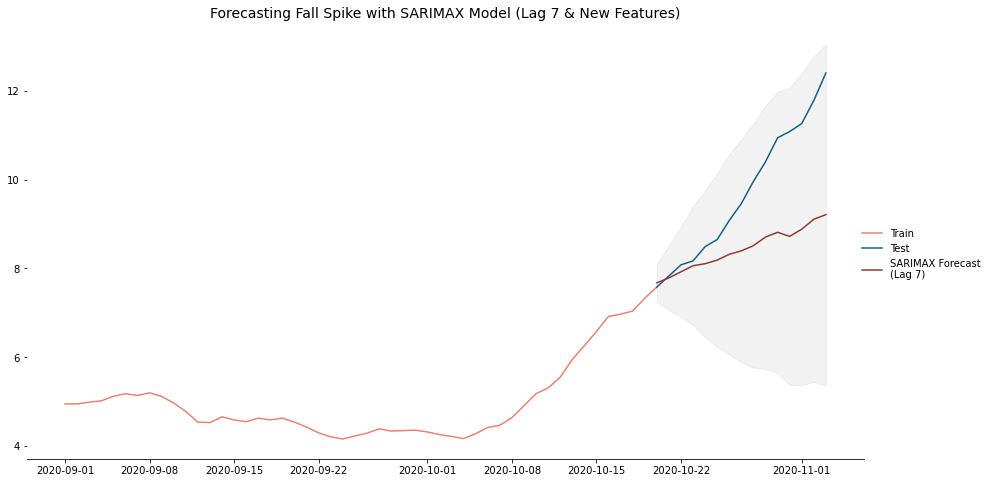

In [280]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 7)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 7 & New Features)',
                          dist=.85,
                          min=lower_series)

In [281]:
SARIMAX_lag7_metrics_v4 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 7) - April 15', 'rmse': SARIMAX_lag7_metrics_v4['rmse']})
SARIMAX_lag7_metrics_v4

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.11710051105968428,
 'me': -1.250265371726887,
 'mae': 1.2628325389772717,
 'mpe': -0.11544257342770738,
 'rmse': 1.635958765928151,
 'acf1': 0.8003989417426525,
 'corr': 0.98941412911126,
 'minmax': 0.11709032981917933}

## Testing Restrictions (Lag 14)

In [282]:
# SARIMAX Model with 14-day lag and starting on 4-15
sxmodel_13 = pm.auto_arima(train.loc['2020-04-15':], exogenous=testing[['holiday_14', 'tight_res_14', 'loose_res_14', 'PRCP_14', 'TAVG_14']].loc['2020-04-15':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_13.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=33.035, Time=0.99 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=691.563, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=79.116, Time=0.80 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=422.276, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=728.573, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=118.985, Time=0.72 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=51.085, Time=1.10 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=34.744, Time=1.75 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=46.112, Time=0.97 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=33.969, Time=1.85 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=79.135, Time=0.84 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=51.146, Time=1.00 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=30.017, Time=1.08 sec
 ARIMA(1,0,2)(0,1,0)[7] intercept   : AIC=119.275, Time=0.68 sec
 ARIMA(1,0,2)(1,1,1)[7] intercept   : AIC=31.898, Time=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  189
Model:             SARIMAX(2, 0, 3)x(0, 1, [1, 2], 7)   Log Likelihood                  21.609
Date:                                Tue, 17 Nov 2020   AIC                            -17.219
Time:                                        00:19:00   BIC                             24.433
Sample:                                    04-15-2020   HQIC                            -0.334
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_14       0.0275      0.127      0.217      0.828      -0.221       0.276
tight_res_14    -0.0046      0.241     -0.019      0.985      -0.478       0.469
loose_res_14     0.0876      0.080      1.102      0.271      -0.068       0.244
PRCP_14         -0.0133      0.016     -0.817      0.414      -0.045       0.019
TAVG_14         -0.0006      0.003     -0.245      0.807      -0.006       0.004
ar.L1            1.8891      0.066     28.431      0.000       1.759       2.019
ar.L2           -0.8922      0.066    -13.509      0.000      -1.022      -0.763
ma.L1           -0.3752      0.065     -5.779      0.000      -0.502      -0.248
ma.L2           -0.1496      0.090     -1.662      0.096      -0.326       0.027
ma.L3            0.0624      0.084      0.744      0.457      -0.102       0.227
ma.S.L7         -1.1877      0.087    -13.584      0.000      -1.359      -1.016
ma.S.L14         0.4682      0.077      6.054      0.000       0.317       0.620
sigma2           0.0429      0.004     11.769      0.000       0.036       0.050
===================================================================================
Ljung-Box (Q):                       66.04   Jarque-Bera (JB):               426.40
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [283]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_13.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_14', 'tight_res_14', 'loose_res_14', 'PRCP_14', 'TAVG_14']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


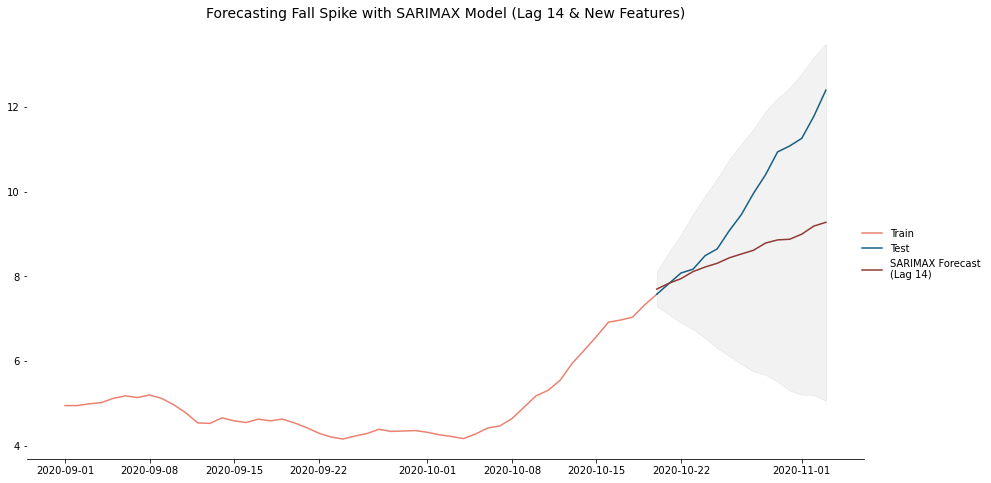

In [284]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 14)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 14 & New Features)',
                          dist=.85,
                          min=lower_series)

In [285]:
SARIMAX_lag14_metrics_v4 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 14) - April 15', 'rmse': SARIMAX_lag14_metrics_v4['rmse']})
SARIMAX_lag14_metrics_v4

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.10876385857617019,
 'me': -1.1634601158246884,
 'mae': 1.180647914702788,
 'mpe': -0.1065007023476523,
 'rmse': 1.5632296966161152,
 'acf1': 0.7976534515533551,
 'corr': 0.9847413970474574,
 'minmax': 0.10874703376452655}

In [286]:
pd.DataFrame(model_comparisons)

,model_name,rmse
0,Naive Model,2.581849
1,Moving Average Model,3.111612
2,Triple Exponential Smoothing,1.251954
3,SARIMA,1.148875
4,SARIMAX (Lag 5),1.504254
5,SARIMAX (Lag 10),2.263617
6,SARIMAX (Lag 15),1.134362
7,SARIMAX (Lag 7),1.256658
8,SARIMAX (Lag 14),1.349854
9,SARIMAX (Lag 15) - Shorter Train,1.407605


## Tweaking training period for SARIMAX Lag 10 to see if I can beat previous best
### Starting on 7-1

In [295]:
# SARIMAX Model with 7-day lag and starting on 7-1
sxmodel_14 = pm.auto_arima(train.loc['2020-07-01':], exogenous=testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].loc['2020-07-01':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_14.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=-94.451, Time=0.21 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=-132.751, Time=0.50 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=-144.071, Time=0.53 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=-110.898, Time=0.29 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=-141.702, Time=0.65 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=-142.933, Time=0.86 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=-126.170, Time=0.43 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=-141.473, Time=0.95 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=-118.416, Time=0.41 sec
 ARIMA(0,1,2)(0,1,1)[7]             : AIC=-152.835, Time=0.64 sec
 ARIMA(0,1,2)(0,1,0)[7]             : AIC=-112.949, Time=0.36 sec
 ARIMA(0,1,2)(1,1,1)[7]             : AIC=-150.370, Time=0.74 sec
 ARIMA(0,1,2)(0,1,2)[7]             : AIC=-150.520, Time=1.10 sec
 ARIMA(0,1,2)(1,1,0)[7]             : A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  112
Model:             SARIMAX(1, 1, 3)x(2, 1, [1], 7)   Log Likelihood                  97.574
Date:                             Tue, 17 Nov 2020   AIC                           -169.149
Time:                                     00:27:00   BIC                           -134.772
Sample:                                 07-01-2020   HQIC                          -155.222
                                      - 10-20-2020                                         
Covariance Type:                               opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_10       0.0150      0.041      0.368      0.713      -0.065       0.095
tight_res_10     0.0486      0.073      0.670      0.503      -0.094       0.191
loose_res_10    -0.0158      0.051     -0.313      0.754      -0.115       0.083
PRCP_10         -0.0291      0.025     -1.153      0.249      -0.079       0.020
TAVG_10          0.0015      0.002      0.883      0.377      -0.002       0.005
ar.L1            0.9149      0.085     10.777      0.000       0.748       1.081
ma.L1           -0.3773      0.136     -2.765      0.006      -0.645      -0.110
ma.L2           -0.0860      0.104     -0.829      0.407      -0.289       0.117
ma.L3           -0.0188      0.135     -0.140      0.889      -0.283       0.245
ar.S.L7         -0.3396      0.161     -2.114      0.034      -0.654      -0.025
ar.S.L14        -0.4061      0.146     -2.790      0.005      -0.691      -0.121
ma.S.L7         -0.7098      0.234     -3.033      0.002      -1.169      -0.251
sigma2           0.0080      0.001      6.624      0.000       0.006       0.010
===================================================================================
Ljung-Box (Q):                       31.68   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.82   Prob(JB):                         0.44
Heteroskedasticity (H):               1.13   Skew:                             0.23
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [296]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_14.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


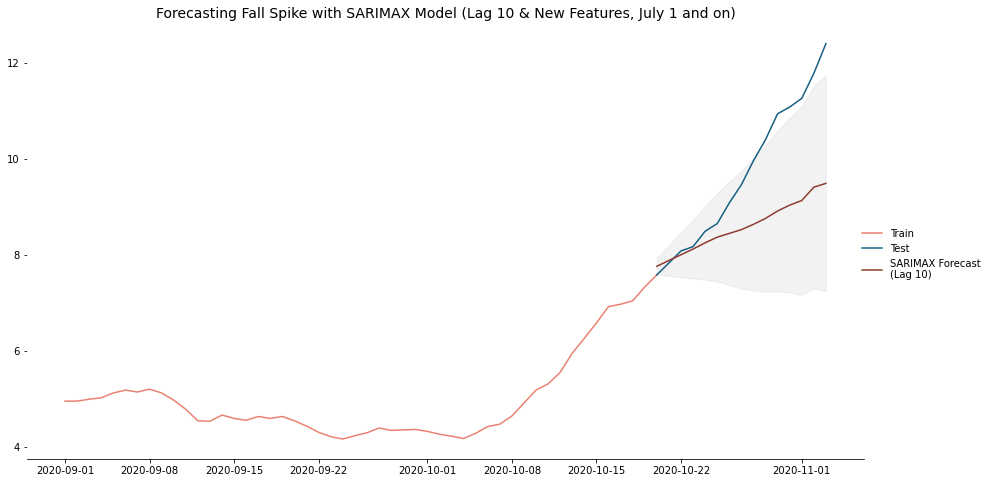

In [297]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10 & New Features, July 1 and on)',
                          dist=.85,
                          min=lower_series)

In [302]:
SARIMAX_lag10_metrics_v5 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - July 1', 'rmse': SARIMAX_lag10_metrics_v5['rmse']})
SARIMAX_lag10_metrics_v5

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.10411351430860533,
 'me': -1.0961116836077005,
 'mae': 1.126815907781836,
 'mpe': -0.10009102083759837,
 'rmse': 1.4793785209881767,
 'acf1': 0.7984871859819853,
 'corr': 0.9902195912451244,
 'minmax': 0.10407403793688341}

## Starting on 3-1

In [303]:
# SARIMAX Model with 10-day lag and starting on 3-1
sxmodel_15 = pm.auto_arima(train, exogenous=testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].loc[:'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_15.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=608.096, Time=1.13 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=1209.415, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=621.110, Time=0.97 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=926.963, Time=1.15 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=1208.294, Time=0.17 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=647.609, Time=0.67 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=606.088, Time=1.27 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=611.440, Time=1.11 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=607.800, Time=2.03 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=606.688, Time=2.18 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=609.546, Time=2.51 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=608.332, Time=2.19 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=610.141, Time=2.38 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=895.358, Time=1.15 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=613

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  234
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 7)   Log Likelihood                -288.420
Date:                           Tue, 17 Nov 2020   AIC                            598.840
Time:                                   00:32:46   BIC                            636.515
Sample:                               03-01-2020   HQIC                           614.043
                                    - 10-20-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0065      0.033      0.198      0.843      -0.058       0.070
holiday_10       0.0413      0.899      0.046      0.963      -1.722       1.804
tight_res_10     0.1399      0.260      0.539      0.590      -0.369       0.649
loose_res_10     0.0784      0.602      0.130      0.896      -1.102       1.259
PRCP_10          0.0226      0.149      0.151      0.880      -0.270       0.315
TAVG_10         -0.0043      0.012     -0.376      0.707      -0.027       0.018
ar.L1            0.2372      0.041      5.842      0.000       0.158       0.317
ar.L2            0.7602      0.040     18.803      0.000       0.681       0.839
ma.L1            0.9883      0.109      9.073      0.000       0.775       1.202
ma.S.L7         -0.6898      0.040    -17.449      0.000      -0.767      -0.612
sigma2           0.7089      0.073      9.739      0.000       0.566       0.852
===================================================================================
Ljung-Box (Q):                       77.12   Jarque-Bera (JB):             29112.49
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -5.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [304]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_15.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


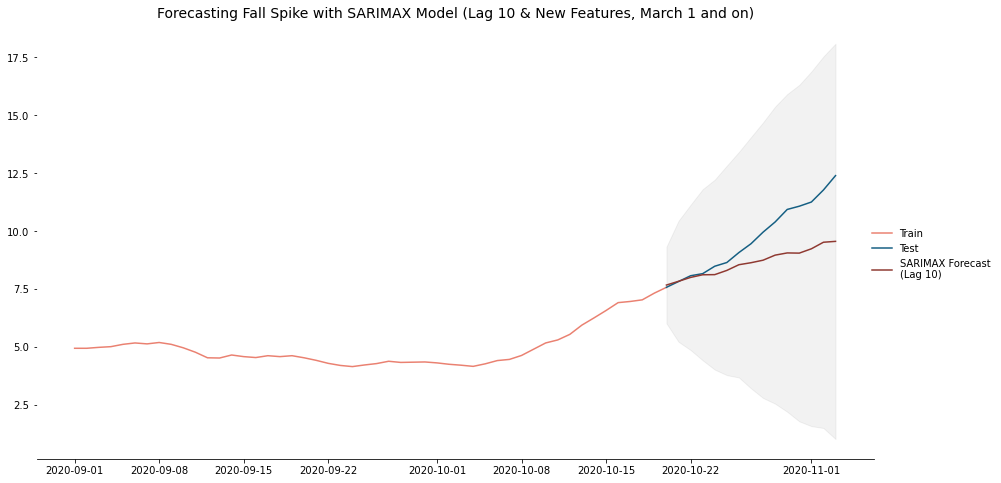

In [305]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10 & New Features, March 1 and on)',
                          dist=.85,
                          min=lower_series)

In [306]:
SARIMAX_lag10_metrics_v6 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - March 1', 'rmse': SARIMAX_lag10_metrics_v6['rmse']})
SARIMAX_lag10_metrics_v6

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.09786953632158894,
 'me': -1.0472515234230506,
 'mae': 1.0616662332101012,
 'mpe': -0.095973276726348,
 'rmse': 1.4033229081949918,
 'acf1': 0.7873435420823695,
 'corr': 0.9888147297808029,
 'minmax': 0.09785833005064026}

## Starting on 4-1

In [307]:
# SARIMAX Model with 10-day lag and starting on 4-1
sxmodel_16 = pm.auto_arima(train.loc['2020-04-01':], exogenous=testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].loc['2020-04-01':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_16.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=40.246, Time=1.02 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=749.605, Time=0.46 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=99.210, Time=1.19 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=502.522, Time=0.98 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=790.287, Time=0.21 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=145.497, Time=0.73 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=37.628, Time=1.18 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=61.951, Time=0.92 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=2.02 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=42.344, Time=2.01 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=38.231, Time=1.77 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=60.788, Time=2.02 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=31.146, Time=2.52 sec
 ARIMA(0,0,1)(2,1,2)[7] intercept   : AIC=inf, Time=2.35 sec
 ARIMA(1,0,0)(2,1,2)[7] intercept   : AIC=85.839, Time=2.46 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  203
Model:             SARIMAX(1, 0, 3)x(2, 1, [1, 2], 7)   Log Likelihood                   6.276
Date:                                Tue, 17 Nov 2020   AIC                             17.448
Time:                                        00:34:42   BIC                             66.620
Sample:                                    04-01-2020   HQIC                            37.355
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0234      0.032     -0.722      0.470      -0.087       0.040
holiday_10       0.0505      0.086      0.586      0.558      -0.118       0.219
tight_res_10    -0.0839      0.132     -0.637      0.524      -0.342       0.174
loose_res_10    -0.1142      0.052     -2.178      0.029      -0.217      -0.011
PRCP_10         -0.0171      0.025     -0.680      0.497      -0.067       0.032
TAVG_10          0.0009      0.003      0.316      0.752      -0.005       0.006
ar.L1            0.9760      0.016     61.711      0.000       0.945       1.007
ma.L1            0.6289      0.094      6.689      0.000       0.445       0.813
ma.L2            0.2671      0.111      2.410      0.016       0.050       0.484
ma.L3            0.0681      0.083      0.818      0.413      -0.095       0.231
ar.S.L7          0.0328      0.110      0.299      0.765      -0.182       0.248
ar.S.L14        -0.2848      0.081     -3.533      0.000      -0.443      -0.127
ma.S.L7         -1.0812      0.140     -7.716      0.000      -1.356      -0.807
ma.S.L14         0.8013      0.151      5.315      0.000       0.506       1.097
sigma2           0.0494      0.005     10.202      0.000       0.040       0.059
===================================================================================
Ljung-Box (Q):                      117.80   Jarque-Bera (JB):               519.56
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [308]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_16.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


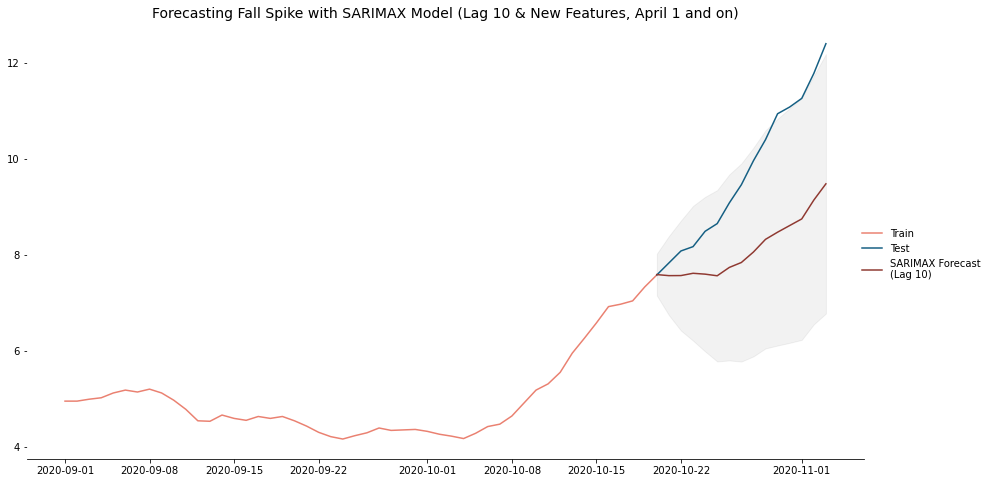

In [309]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10 & New Features, April 1 and on)',
                          dist=.85,
                          min=lower_series)

In [310]:
SARIMAX_lag10_metrics_v7 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - April 1', 'rmse': SARIMAX_lag10_metrics_v7['rmse']})
SARIMAX_lag10_metrics_v7

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.14923884597232576,
 'me': -1.550816351662841,
 'mae': 1.5518048479369562,
 'mpe': -0.14910843749289102,
 'rmse': 1.8073318364688902,
 'acf1': 0.8027936998556626,
 'corr': 0.9642392014458413,
 'minmax': 0.1492387822607466}

## Starting on 5-1

In [311]:
# SARIMAX Model with 10-day lag and starting on 5-1
sxmodel_17 = pm.auto_arima(train.loc['2020-05-01':], exogenous=testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].loc['2020-05-01':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_17.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-62.691, Time=0.91 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=633.031, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-46.238, Time=0.82 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=342.656, Time=0.88 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=665.800, Time=0.13 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=-19.825, Time=0.61 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-39.938, Time=0.98 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-78.523, Time=1.62 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=-83.348, Time=1.80 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=-81.080, Time=1.84 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=-67.118, Time=1.93 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=247.677, Time=1.93 sec
 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=-63.126, Time=1.42 sec
 ARIMA(2,0,1)(1,1,2)[7] intercept   : AIC=-76.086, Time=2.00 sec
 ARIMA(1,0,2)(1,1,2)[7] intercept   : AIC=-97.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  173
Model:             SARIMAX(2, 0, 3)x(0, 1, [1, 2], 7)   Log Likelihood                  67.742
Date:                                Tue, 17 Nov 2020   AIC                           -109.485
Time:                                        00:36:41   BIC                            -69.029
Sample:                                    05-01-2020   HQIC                           -93.063
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_10       0.0238      0.047      0.510      0.610      -0.067       0.115
tight_res_10    -0.0016      0.117     -0.013      0.989      -0.230       0.227
loose_res_10    -0.1342      0.047     -2.881      0.004      -0.226      -0.043
PRCP_10         -0.0162      0.013     -1.274      0.203      -0.041       0.009
TAVG_10          0.0008      0.001      0.512      0.609      -0.002       0.004
ar.L1            0.6601      0.284      2.325      0.020       0.104       1.216
ar.L2            0.3156      0.280      1.126      0.260      -0.234       0.865
ma.L1            0.7592      0.240      3.161      0.002       0.288       1.230
ma.L2            0.6946      0.136      5.125      0.000       0.429       0.960
ma.L3            0.4269      0.143      2.985      0.003       0.147       0.707
ma.S.L7         -0.8688      0.091     -9.506      0.000      -1.048      -0.690
ma.S.L14         0.5541      0.103      5.382      0.000       0.352       0.756
sigma2           0.0245      0.003      8.813      0.000       0.019       0.030
===================================================================================
Ljung-Box (Q):                       57.66   Jarque-Bera (JB):                10.28
Prob(Q):                              0.03   Prob(JB):                         0.01
Heteroskedasticity (H):               0.33   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [312]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_17.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


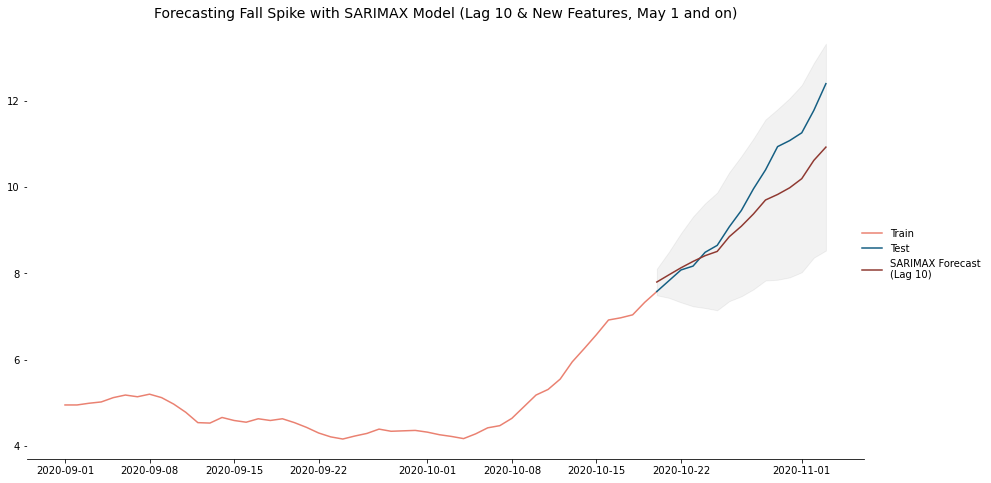

In [313]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10 & New Features, May 1 and on)',
                          dist=.85,
                          min=lower_series)

In [314]:
SARIMAX_lag10_metrics_v8 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - May 1', 'rmse': SARIMAX_lag10_metrics_v8['rmse']})
SARIMAX_lag10_metrics_v8

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.052824990541397554,
 'me': -0.49836820572660717,
 'mae': 0.5670096199251649,
 'mpe': -0.0440376694343386,
 'rmse': 0.7387863434016126,
 'acf1': 0.7888616155172575,
 'corr': 0.997880080840866,
 'minmax': 0.05273633980660086}

## Starting on 5-15

In [339]:
# SARIMAX Model with 10-day lag and starting on 5-15
sxmodel_18 = pm.auto_arima(train.loc['2020-05-15':], exogenous=testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].loc['2020-05-15':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_18.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-79.444, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=513.274, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-52.659, Time=0.74 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=264.686, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=529.712, Time=0.23 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=-61.584, Time=0.67 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-85.036, Time=1.15 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=-70.769, Time=0.98 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=-74.850, Time=1.86 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=-87.128, Time=1.76 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-89.220, Time=1.60 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=-72.321, Time=1.43 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=-87.303, Time=1.88 sec
 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=-104.751,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  159
Model:             SARIMAX(2, 0, 2)x(1, 1, 2, 7)   Log Likelihood                  73.386
Date:                           Tue, 17 Nov 2020   AIC                           -120.771
Time:                                   00:56:30   BIC                            -81.461
Sample:                               05-15-2020   HQIC                          -104.802
                                    - 10-20-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_10       0.0265      0.049      0.545      0.586      -0.069       0.122
tight_res_10     0.0798      0.089      0.894      0.371      -0.095       0.255
loose_res_10    -0.0443      0.046     -0.957      0.338      -0.135       0.046
PRCP_10          0.0249      0.011      2.238      0.025       0.003       0.047
TAVG_10          0.0011      0.002      0.495      0.621      -0.003       0.005
ar.L1            0.3504      0.205      1.711      0.087      -0.051       0.752
ar.L2            0.6413      0.204      3.139      0.002       0.241       1.042
ma.L1            1.0358      0.223      4.639      0.000       0.598       1.473
ma.L2            0.4374      0.100      4.391      0.000       0.242       0.633
ar.S.L7          0.3155      0.210      1.501      0.133      -0.096       0.727
ma.S.L7         -1.0415      0.176     -5.928      0.000      -1.386      -0.697
ma.S.L14         0.6531      0.120      5.424      0.000       0.417       0.889
sigma2           0.0209      0.003      7.566      0.000       0.016       0.026
===================================================================================
Ljung-Box (Q):                       66.93   Jarque-Bera (JB):                17.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.44
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [410]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_18.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-412-9bd0f44d8920>:40: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


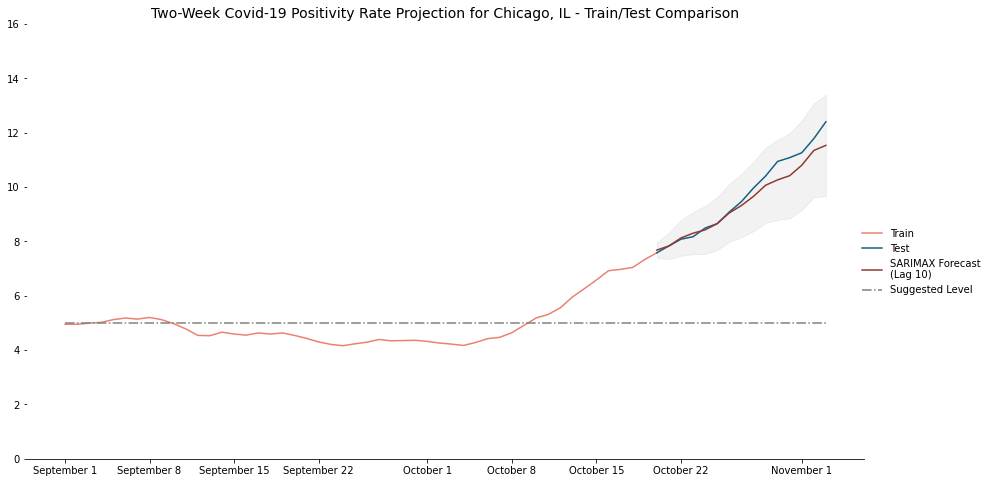

In [412]:
vars_list = [train['2020-09-01':], test, fc_series]
var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)', 'Suggested Level']
title = 'Two-Week Covid-19 Positivity Rate Projection for Chicago, IL - Train/Test Comparison'
dist=.85
min=lower_series


# Plotting code
fig, ax = plt.subplots(figsize=(15,8))
fig.patch.set_facecolor('white')

colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
        '#a2755e']

# Adding unique x-tick labels for specified range
x = ['September 1', 'September 8', 'September 15', 'September 22', 'October 1', 
     'October 8', 'October 15', 'October 22', 'November 1']

var_handles = []
for i in range(len(vars_list)):
    var_handles.append(ax.plot(vars_list[i], color = colors[i]))

# Adding dotted line for suggested positivity rate level (5-percent)
var_handles.append(ax.plot(pd.Series(5, index = pd.date_range('2020-09-01', '2020-11-03')), color = 'grey', linestyle='-.'))

# Adding confidence interval
ax.fill_between(lower_series.index, 
                 min, 
                 upper_series, 
                 color='k', alpha=.05)

spine_position = ['top', 'left', 'right']
for spine in spine_position:    
    ax.spines[spine].set_color('white')

ax.set_title(title, fontsize=14)
ax.set_xticklabels(x)
ax.set_yticks(np.arange(0,18,2))

ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
plt.show()

In [318]:
SARIMAX_lag10_metrics_v9 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - May 15', 'rmse': SARIMAX_lag10_metrics_v9['rmse']})
SARIMAX_lag10_metrics_v9

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.026348358601804178,
 'me': -0.2475961672119644,
 'mae': 0.2850406584189731,
 'mpe': -0.021634106029428796,
 'rmse': 0.39310333818844234,
 'acf1': 0.6584919184644731,
 'corr': 0.9963070254898785,
 'minmax': 0.02631816119273933}

## Starting on 5-8

In [330]:
# SARIMAX Model with 10-day lag and starting on 5-8
sxmodel_19 = pm.auto_arima(train.loc['2020-05-08':], exogenous=testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].loc['2020-05-08':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_19.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-70.916, Time=0.90 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=577.366, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-48.329, Time=0.81 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=602.125, Time=0.11 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=-43.815, Time=0.60 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-74.757, Time=1.05 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=-72.336, Time=0.85 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=-70.575, Time=1.64 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=-81.453, Time=1.69 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-83.746, Time=1.48 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=264.253, Time=1.58 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=-64.032, Time=1.39 sec
 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=-81.538, Time=1.87 sec
 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=-90.736, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  166
Model:             SARIMAX(3, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood                  67.019
Date:                                Tue, 17 Nov 2020   AIC                           -108.039
Time:                                        00:50:22   BIC                            -68.143
Sample:                                    05-08-2020   HQIC                           -91.838
                                         - 10-20-2020                                         
Covariance Type:                                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_10       0.0034      0.042      0.081      0.936      -0.078       0.085
tight_res_10    -0.0023      0.117     -0.019      0.985      -0.232       0.228
loose_res_10    -0.1844      0.046     -4.023      0.000      -0.274      -0.095
PRCP_10         -0.0063      0.013     -0.490      0.624      -0.031       0.019
TAVG_10          0.0010      0.002      0.468      0.640      -0.003       0.005
ar.L1            0.6050      0.109      5.539      0.000       0.391       0.819
ar.L2            0.9193      0.116      7.896      0.000       0.691       1.147
ar.L3           -0.5324      0.077     -6.950      0.000      -0.682      -0.382
ma.L1            0.8524      0.098      8.704      0.000       0.660       1.044
ar.S.L7          0.1555      0.204      0.761      0.446      -0.245       0.556
ma.S.L7         -1.0513      0.186     -5.665      0.000      -1.415      -0.688
ma.S.L14         0.6373      0.142      4.497      0.000       0.360       0.915
sigma2           0.0231      0.003      8.560      0.000       0.018       0.028
===================================================================================
Ljung-Box (Q):                       54.27   Jarque-Bera (JB):                13.04
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [331]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_19.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


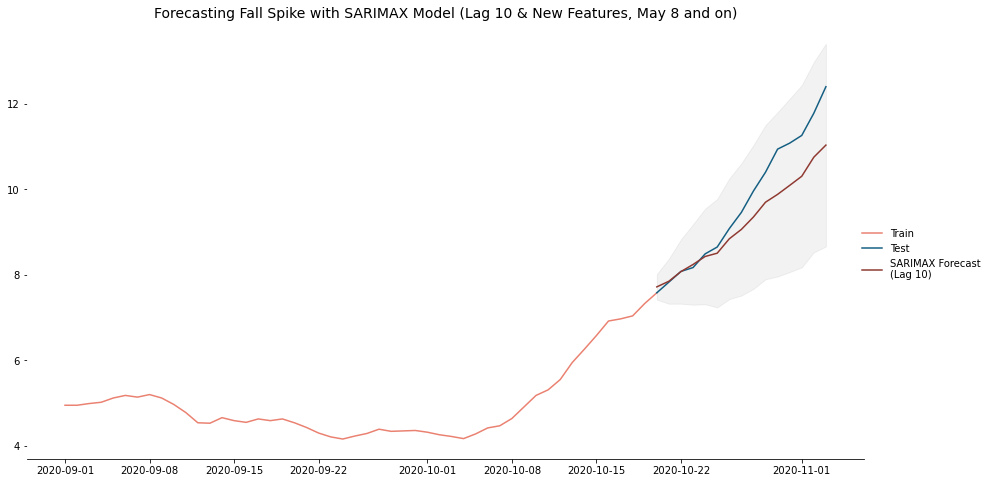

In [332]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10 & New Features, May 8 and on)',
                          dist=.85,
                          min=lower_series)

In [333]:
SARIMAX_lag10_metrics_v10 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - April 2', 'rmse': SARIMAX_lag10_metrics_v10['rmse']})
SARIMAX_lag10_metrics_v10

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.04791717142572624,
 'me': -0.48788474783464986,
 'mae': 0.5186194832851957,
 'mpe': -0.04396529145561739,
 'rmse': 0.6859366775230151,
 'acf1': 0.7780613918892733,
 'corr': 0.9977300637908159,
 'minmax': 0.04788983764540511}

## Starting on 5-22

In [334]:
# SARIMAX Model with 10-day lag and starting on 5-22
sxmodel_20 = pm.auto_arima(train.loc['2020-05-22':], exogenous=testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].loc['2020-05-22':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_20.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-76.781, Time=0.85 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=461.287, Time=0.29 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-74.114, Time=0.80 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=257.093, Time=0.86 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=469.688, Time=0.14 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=-78.572, Time=0.57 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=-99.926, Time=0.92 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=-86.353, Time=1.69 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-74.921, Time=0.95 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=-88.959, Time=1.59 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=204.057, Time=0.75 sec
 ARIMA(2,0,1)(1,1,0)[7] intercept   : AIC=-82.862, Time=0.98 sec
 ARIMA(1,0,2)(1,1,0)[7] intercept   : AIC=-122.687, Time=1.03 sec
 ARIMA(1,0,2)(0,1,0)[7] intercept   : AIC=-92.289, Time=0.75 sec
 ARIMA(1,0,2)(2,1,0)[7] intercept   : AIC=-121

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  152
Model:             SARIMAX(1, 0, 2)x(0, 1, 2, 7)   Log Likelihood                  76.412
Date:                           Tue, 17 Nov 2020   AIC                           -128.824
Time:                                   00:51:58   BIC                            -93.104
Sample:                               05-22-2020   HQIC                          -114.310
                                    - 10-20-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -0.0119      0.019     -0.634      0.526      -0.048       0.025
holiday_10       0.0127      0.059      0.217      0.828      -0.102       0.127
tight_res_10     0.0520      0.107      0.487      0.627      -0.157       0.261
loose_res_10    -0.0501      0.041     -1.211      0.226      -0.131       0.031
PRCP_10         -0.0029      0.011     -0.271      0.787      -0.024       0.018
TAVG_10          0.0035      0.002      1.693      0.090      -0.001       0.007
ar.L1            0.9812      0.011     86.681      0.000       0.959       1.003
ma.L1            0.4568      0.079      5.758      0.000       0.301       0.612
ma.L2            0.4170      0.090      4.649      0.000       0.241       0.593
ma.S.L7         -0.6763      0.103     -6.597      0.000      -0.877      -0.475
ma.S.L14         0.3602      0.115      3.136      0.002       0.135       0.585
sigma2           0.0195      0.002      8.624      0.000       0.015       0.024
===================================================================================
Ljung-Box (Q):                       37.73   Jarque-Bera (JB):                 8.97
Prob(Q):                              0.57   Prob(JB):                         0.01
Heteroskedasticity (H):               0.55   Skew:                            -0.22
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [342]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_20.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'tight_res_10', 'loose_res_10', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


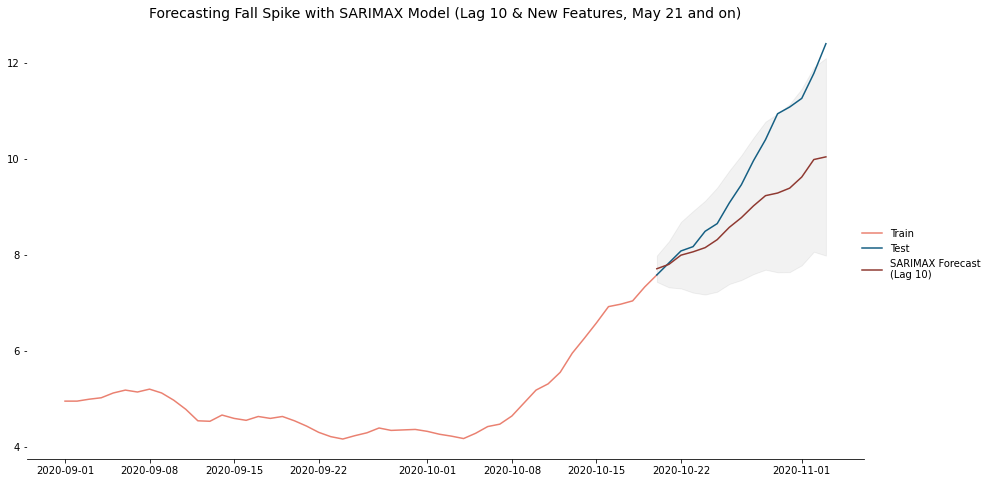

In [343]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10 & New Features, May 21 and on)',
                          dist=.85,
                          min=lower_series)

In [338]:
SARIMAX_lag10_metrics_v11 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - May 21', 'rmse': SARIMAX_lag10_metrics_v11['rmse']})
SARIMAX_lag10_metrics_v11

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.08338608981694913,
 'me': -0.8806935346995644,
 'mae': 0.8979377824837684,
 'mpe': -0.08111112309080085,
 'rmse': 1.1634778729370023,
 'acf1': 0.7665522870882445,
 'corr': 0.9940627456970286,
 'minmax': 0.08336700738024427}

## Trying best-performing model with phases instead

In [344]:
# SARIMAX Model with 10-day lag and starting on 5-15
sxmodel_22 = pm.auto_arima(train.loc['2020-05-15':], exogenous=testing[['holiday_10', 'restrictions', 'PRCP_10', 'TAVG_10']].loc['2020-05-15':'2020-10-20',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_22.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-101.779, Time=0.74 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=508.005, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=264.796, Time=0.80 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=520.693, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=-65.870, Time=0.55 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-89.774, Time=0.95 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=-97.450, Time=1.40 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=-74.333, Time=0.81 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=-87.274, Time=1.70 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=-76.167, Time=0.73 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=-73.039, Time=0.88 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=-93.381, Time=0.92 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=430.262, Time=0.60 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=121.897,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  159
Model:             SARIMAX(2, 0, 2)x(1, 1, 2, 7)   Log Likelihood                  72.886
Date:                           Tue, 17 Nov 2020   AIC                           -121.772
Time:                                   01:00:57   BIC                            -85.485
Sample:                               05-15-2020   HQIC                          -107.031
                                    - 10-20-2020                                         
Covariance Type:                             opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
holiday_10       0.0341      0.051      0.671      0.502      -0.066       0.134
restrictions    -0.0837      0.055     -1.518      0.129      -0.192       0.024
PRCP_10          0.0258      0.011      2.310      0.021       0.004       0.048
TAVG_10          0.0008      0.002      0.374      0.708      -0.003       0.005
ar.L1            0.1654      0.101      1.631      0.103      -0.033       0.364
ar.L2            0.8222      0.101      8.161      0.000       0.625       1.020
ma.L1            1.2510      0.114     10.981      0.000       1.028       1.474
ma.L2            0.5325      0.086      6.208      0.000       0.364       0.701
ar.S.L7          0.4072      0.255      1.595      0.111      -0.093       0.908
ma.S.L7         -1.0458      0.229     -4.567      0.000      -1.495      -0.597
ma.S.L14         0.5513      0.131      4.225      0.000       0.296       0.807
sigma2           0.0209      0.003      7.734      0.000       0.016       0.026
===================================================================================
Ljung-Box (Q):                       53.97   Jarque-Bera (JB):                17.13
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [345]:
# Forecast
n_periods = len(test)
fc, confint = sxmodel_22.predict(n_periods = n_periods, 
                              exogenous = testing[['holiday_10', 'restrictions', 'PRCP_10', 'TAVG_10']].iloc[-15:,:],
                              return_conf_int=True)
index = test.index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

<ipython-input-61-312df03f6cfa>:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


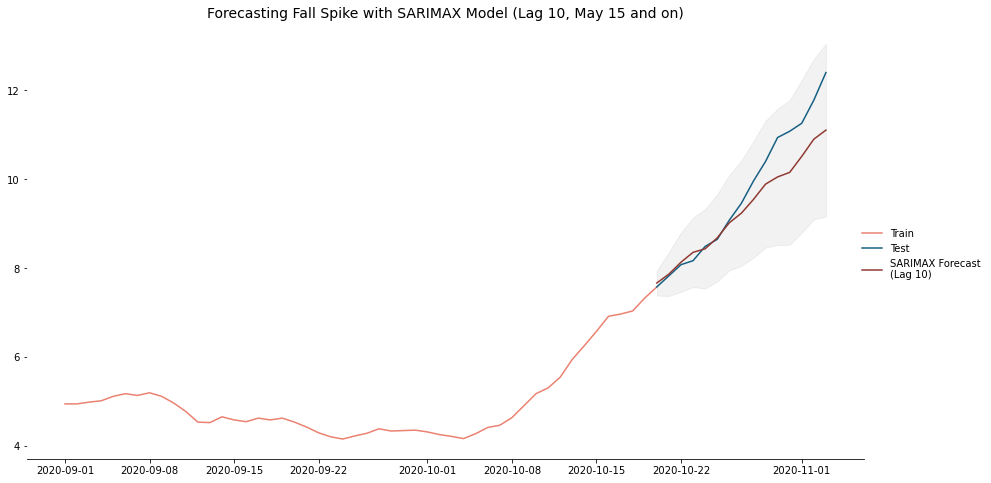

In [346]:
forecast_plot(vars_list =[train['2020-09-01':], test, fc_series],
                          var_labels = ['Train', 'Test','SARIMAX Forecast\n(Lag 10)'],
                          title = 'Forecasting Fall Spike with SARIMAX Model (Lag 10, May 15 and on)',
                          dist=.85,
                          min=lower_series)

In [347]:
SARIMAX_lag10_metrics_v13 = forecast_accuracy(fc_series, test)
model_comparisons.append({'model_name': 'SARIMAX (Lag 10) - May 15 (phases)', 'rmse': SARIMAX_lag10_metrics_v13['rmse']})
SARIMAX_lag10_metrics_v13

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.03907624068235484,
 'me': -0.37197722170747993,
 'mae': 0.42566628391111877,
 'mpe': -0.03238432839323566,
 'rmse': 0.5873475789974898,
 'acf1': 0.7424678136929682,
 'corr': 0.9947749777310805,
 'minmax': 0.03902718503893021}

In [348]:
pd.DataFrame(model_comparisons).sort_values(by='rmse')

,model_name,rmse
21,SARIMAX (Lag 10) - May 15,0.393103
24,SARIMAX (Lag 10) - May 15 (phases),0.587348
22,SARIMAX (Lag 10) - April 2,0.685937
20,SARIMAX (Lag 10) - May 1,0.738786
13,SARIMAX (Lag 10) - April 15,1.015277
6,SARIMAX (Lag 15),1.134362
3,SARIMA,1.148875
23,SARIMAX (Lag 10) - May 21,1.163478
12,SARIMAX (Lag 5) - April 15,1.216095
2,Triple Exponential Smoothing,1.251954


### SARIMAX Model with 7-day lag and Training set starting on 4-8 performs best.

In [389]:
weather_forecast = weather.loc[:,['Date', 'PRCP', 'TAVG']]

In [391]:
# Adding weather forecast for the rest of this week
fourteen_day_forecast = [{'Date': '2020-11-08', 'PRCP': 0.00, 'TAVG': 66.0},
                      {'Date': '2020-11-09', 'PRCP': 0.00, 'TAVG': 70.0},
                      {'Date': '2020-11-10', 'PRCP': 0.07, 'TAVG': 54.5},
                      {'Date': '2020-11-11', 'PRCP': 0.00, 'TAVG': 41.0},
                      {'Date': '2020-11-12', 'PRCP': 0.00, 'TAVG': 43.5},
                      {'Date': '2020-11-13', 'PRCP': 0.00, 'TAVG': 42.0},
                      {'Date': '2020-11-14', 'PRCP': 0.05, 'TAVG': 50.0},
                      {'Date': '2020-11-15', 'PRCP': None, 'TAVG': None},
                      {'Date': '2020-11-16', 'PRCP': None, 'TAVG': None},
                      {'Date': '2020-11-17', 'PRCP': None, 'TAVG': None}]

weather_forecast = weather_forecast.append(pd.DataFrame(fourteen_day_forecast))

In [392]:
# Creating lagged temperature
weather_forecast['TAVG_7'] = weather_forecast.TAVG.shift(7)

# Creating lagged precipitation
weather_forecast['PRCP_7'] = weather_forecast.PRCP.shift(7)


In [393]:
weather_forecast.Date = pd.to_datetime(weather_forecast.Date)
weather_forecast.set_index('Date', inplace=True)
weather_forecast = weather_forecast.loc['2020-03-01':,['TAVG_7', 'PRCP_7']]

In [394]:
holidays_restrictions = testing.loc[:,['holiday_7','tight_res_7','loose_res_7']]
holidays_restrictions.reset_index(inplace=True)

In [395]:
holidays_restrictions.Date = holidays_restrictions.Date.astype(str)

In [396]:
# Adding weather forecast for the rest of this week
holidays_restrictions_dict = [{'Date': '2020-11-04', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-05', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-06', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-07', 'holiday_7': 1, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-08', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-09', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-10', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-11', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-12', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-13', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-14', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-15', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-16', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0},
                      {'Date': '2020-11-17', 'holiday_7': 0, 'tight_res_7': 0, 'loose_res_7': 0}]

holidays_restrictions = holidays_restrictions.append(pd.DataFrame(holidays_restrictions_dict))

In [397]:
holidays_restrictions.Date = pd.to_datetime(holidays_restrictions.Date)
holidays_restrictions.set_index('Date', inplace=True)

In [399]:
forecasting_df = pd.merge(holidays_restrictions, weather_forecast, left_index=True, right_index=True)

In [400]:
forecasting_df = forecasting_df.astype(float)

In [401]:
forecasting_df.columns

Index(['holiday_7', 'tight_res_7', 'loose_res_7', 'TAVG_7', 'PRCP_7'], dtype='object')

## Projecting Covid-19 positivity rates for the next 2 weeks (11/8 - 11/21)

In [365]:
# SARIMAX Model with 10-day lag and starting on 5-15
sxmodel_fin = pm.auto_arima(testing.posRate.loc['2020-05-15':], exogenous=forecasting_df.loc['2020-05-15':'2020-11-03',:],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel_fin.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=-1495.421, Time=0.77 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-946.884, Time=0.14 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-1474.236, Time=0.60 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-1107.611, Time=0.78 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-942.508, Time=0.34 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=-1499.491, Time=0.52 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=-1425.881, Time=0.68 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=-1494.517, Time=1.68 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=-1097.006, Time=0.53 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=-1536.362, Time=0.38 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=-1533.443, Time=0.85 sec
 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=-1534.926, Time=1.20 sec
 ARIMA(2,0,0)(0,1,0)[7] intercept   : AIC=-1521.206, Time=0.52 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=-1442.989, Time=0.73 sec
 ARIMA(1,0,0)(0,1,0)[

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  173
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 7)   Log Likelihood                 776.181
Date:                           Tue, 17 Nov 2020   AIC                          -1536.362
Time:                                   01:10:11   BIC                          -1511.466
Sample:                               05-15-2020   HQIC                         -1526.257
                                    - 11-03-2020                                         
Covariance Type:                             opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -0.0002      0.000     -0.987      0.324      -0.000       0.000
holiday_7       0.0017      0.001      1.800      0.072      -0.000       0.003
tight_res_7     0.0016      0.001      1.593      0.111      -0.000       0.004
loose_res_7    -0.0008      0.001     -1.403      0.161      -0.002       0.000
TAVG_7      -5.519e-06   2.99e-05     -0.185      0.853    -6.4e-05     5.3e-05
PRCP_7       7.094e-05      0.000      0.354      0.723      -0.000       0.000
ar.L1           0.9321      0.011     85.176      0.000       0.911       0.954
sigma2           5e-06   6.11e-07      8.177      0.000     3.8e-06     6.2e-06
===================================================================================
Ljung-Box (Q):                      124.42   Jarque-Bera (JB):               213.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -1.25
Prob(H) (two-sided):                  0.04   Kurtosis:                         7.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [413]:
# Forecasting 14 days out from 11/4 to 11/17
n_periods = 14
fc, confint = sxmodel_fin.predict(n_periods = n_periods, 
                              exogenous = forecasting_df.loc['2020-11-04':,:],
                              return_conf_int=True)
index = forecasting_df.loc['2020-11-04':,:].index

# make series for plotting purpose
fc_series = pd.Series(fc, index=index)
lower_series = pd.Series(confint[:, 0], index=index)
upper_series = pd.Series(confint[:, 1], index=index)

In [414]:
# Creating continuous series that connects original posRate series and forecast.
final_series = testing.posRate.append(fc_series)

In [415]:
# Creating series for suggested positivity rate
pos_suggested = pd.Series(5, index=final_series.index)

<ipython-input-416-5135316c6155>:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)


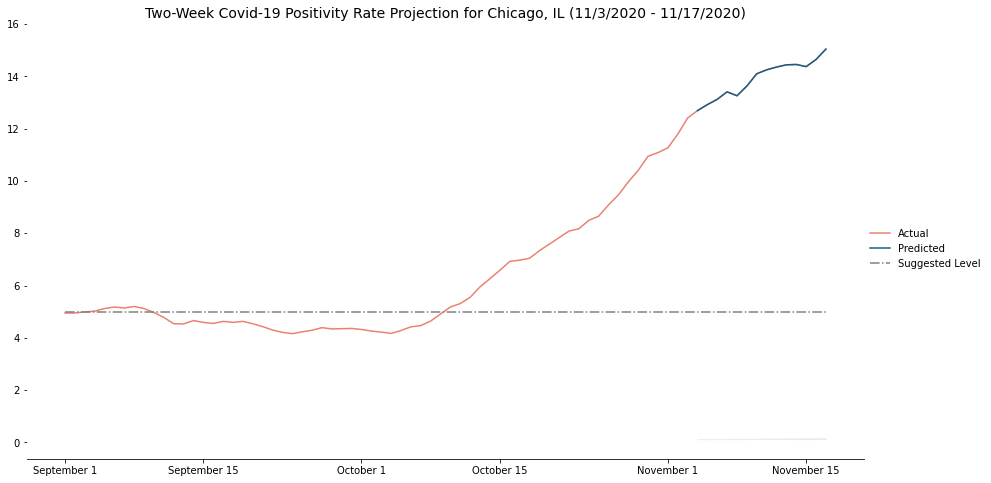

In [416]:
vars_list = [final_series['2020-09-01':]*100, fc_series*100]
var_labels = ['Actual', 'Predicted', 'Suggested Level']
title = 'Two-Week Covid-19 Positivity Rate Projection for Chicago, IL (11/3/2020 - 11/17/2020)'
dist=.85
min=lower_series


# Plotting code
fig, ax = plt.subplots(figsize=(15,8))
fig.patch.set_facecolor('white')

colors =["#ea8171","#155F83", "#8F3931", "#8A9045", "#D5802B", "#350E20", "#58593F", "#880d1e", '#c8674c',
        '#a2755e']

# Adding unique x-tick labels for specified range
x = ['September 1', 'September 15', 'October 1', 'October 15', 'November 1', 'November 15']

var_handles = []
for i in range(len(vars_list)):
    var_handles.append(ax.plot(vars_list[i], color = colors[i]))

# Adding dotted line for suggested positivity rate level (5-percent)
var_handles.append(ax.plot(pos_suggested['2020-09-01':], color = 'grey', linestyle='-.'))

# Adding confidence interval
ax.fill_between(lower_series.index, 
                 min, 
                 upper_series, 
                 color='k', alpha=.05)

spine_position = ['top', 'left', 'right']
for spine in spine_position:    
    ax.spines[spine].set_color('white')

ax.set_title(title, fontsize=14)
ax.set_xticklabels(x)
ax.set_yticks(np.arange(0,18,2))

ax.legend(var_handles, labels = var_labels, bbox_to_anchor=(dist, .35, 0.3, 0.2), loc='upper right', frameon=False)
plt.show()